# Исследование объявлений о продаже квартир

**Цель исследования** - установить параметры для определения рыночной стоимости объектов недвижимости, основываясь на данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Это позволит построить автоматизированную систему, которая сможет отслеживать аномалии и мошенническую деятельность. 

**Ход исследования**

Данные будут получены из файла `real_estate.csv`. При обзоре данных будет совершена проверка на возможные ошибки, которые могут помещать исследованию. После будет совершена предобработка данных с целью исправления ошибок и обработки пропущенных значений, при необходимости буду изменены типы данных. Затем на основе обработанных данных будут расчитаны необходимые дополнительные параметры, что позволит провести полноценный исследовательский анализ данных. По результатам будет сформирован общий вывод. 

Таким образом, исследование пройдёт в пять этапов:

 1. **Обзор данных**
 2. **Предобработка данных**
 3. **Расчёт дополнительных параметров**
 4. **Исследовательский анализ данных**
 5. **Вывод**


## Обзор данных

In [1]:
# импортируем библиотеки для работы с данными

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None
sns.set_style('darkgrid')
sns.set(font_scale = 1.1)
plt.rcParams.update({'axes.labelsize': 15,'axes.titlesize': 25})
os.chdir('C:\\Users\\dmitr\\GitHub\\Practicum-Data-Analysis\\datasets\\')

In [2]:
# загружаем данные и делаем обзор

data = pd.read_csv('real_estate_data.csv', sep='\t')

data.info() # общая информация о таблице
display(data.describe().T) # описательная статистика
display(data.isna().sum()) # количество пропущенных значений в столбцах
data.sample(10) # 10 случайных строк из таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12370,18,"7,575,000.00",59.20,2017-07-21T00:00:00,2,NaN,23.00,32.60,22,NaN,...,3.50,2.00,Санкт-Петербург,"15,749.00","14,545.00",0.00,NaN,0.00,NaN,228.00
19426,20,"4,100,000.00",35.90,2018-03-29T00:00:00,1,2.60,25.00,NaN,25,NaN,...,NaN,NaN,Санкт-Петербург,"15,510.00","16,242.00",1.00,492.00,0.00,NaN,45.00
10560,14,"3,500,000.00",34.00,2017-10-21T00:00:00,1,2.60,9.00,18.00,2,NaN,...,8.00,NaN,Санкт-Петербург,"44,733.00","18,304.00",0.00,NaN,1.00,377.00,56.00
19221,0,"30,000,000.00",301.90,2018-02-01T00:00:00,6,3.00,8.00,163.20,3,NaN,...,20.40,NaN,Санкт-Петербург,"26,872.00","5,574.00",3.00,128.00,1.00,276.00,29.00
5830,0,"4,099,000.00",41.00,2015-11-17T00:00:00,3,NaN,6.00,29.00,5,False,...,6.00,0.00,Санкт-Петербург,"12,856.00","9,528.00",0.00,NaN,1.00,580.00,245.00
23087,5,"3,485,000.00",31.50,2018-11-24T00:00:00,1,2.50,5.00,17.38,1,NaN,...,5.59,NaN,Санкт-Петербург,"16,005.00","11,543.00",1.00,442.00,1.00,829.00,129.00
12802,19,"5,900,000.00",60.00,2018-01-16T00:00:00,2,NaN,17.00,34.00,15,NaN,...,11.00,NaN,Санкт-Петербург,"34,272.00","13,736.00",0.00,NaN,0.00,NaN,69.00
7896,4,"4,400,000.00",39.00,2017-09-03T00:00:00,1,NaN,16.00,20.00,6,NaN,...,10.00,1.00,Санкт-Петербург,"16,798.00","14,760.00",1.00,843.00,0.00,NaN,184.00
3232,9,"4,990,000.00",61.00,2017-08-05T00:00:00,3,2.50,9.00,43.60,6,NaN,...,6.30,0.00,Санкт-Петербург,"45,178.00","16,742.00",1.00,700.00,0.00,NaN,32.00
23589,20,"2,100,000.00",52.60,2018-03-16T00:00:00,2,2.50,4.00,29.20,2,NaN,...,7.40,NaN,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,139.00


Таблица содержит 21 столбец, содержащих 4 типа данных — `bool`, `float64`, `int64` и`object`.

Описание данных согласно документации:
    
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Данные в столбцах делятся на два типа - первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Вывод**

* Больше половины столбцов содержит пропущенные значения.
* Много столбцов сожержат потенциально аномальный значения, например минимальные значения столбцов `last_price` и `rooms`. 
* Все данные типа `float64`, при условии заполнения пропущенных значений, можно привести к целым числам, использование дробей для целей исследования нецелесообразно. Для экономии памяти можно использовать тип `int32`. Исключением будут являться столбцы, содержащие данные о площади (общая, жилая, кухня) или высоте потолков - только они содержат значения после запятой. В них для экономии памяти данные будут приведены к `float32`.
* Согласно документации, столбец `first_day_exposition` должен содержать даты публикации объявления, но данные сохранены как `object`.
* Столбец `is_apartment`, согласно документации, должен содержать булев тип данных, но из-за пропущенных значений данные отображаются как `object`.

## Предобработка данных

Перед началом исследования необходимо изучить столбцы на предмет аномальных и пропущенных значений, а также поменять тип данных. Для этого рассмотрим каждый столбец датасета по отдельности. Для оптимизации процесса создадим функцию `overview` , которая будет выводить описательную статистику и проверять наличие пропущенных значений.
Поскольку большинство изменений типа данных в таблице будет заключаться в приведении к целому числу или упрощению дробей, мы также напишем функции `into_int` и `into_float`, которые будут менять тип данных на `int32` или `float32`. Замена данных на другие типы, при необходимости, будет проводится вручную.

In [3]:
original = data # на всякий случай сделаем переменную с сырым датасетом

col = data.columns.tolist() 
# создадим список с названиями колонок
# колонок в таблице много, потому для удобства работы с функциями
# аргументом будет являтся индекс этого списка


def into_int(index):
    return data.astype({(col[index]): 'int32'})

def into_float(index):
    return data.astype({(col[index]): 'float32'})

# функции возвращает датафрейм, преобразовав данные заданного столбца в `int32` или `int64`. 

def overview(index):
    column = data[col[index]]
    na = column.isna().sum() # количество пропусков
    
    print(column.describe(datetime_is_numeric=True)) # описательная статистика
    print(f'data type - {column.dtypes}') # тип данных столбца
    
    if na > 1: # если есть пропуски:
        
        print()
        print(f'cells with missing data = {na}') # количества пропусков, если они есть
        print(f'missing data share = {round(na/len(column)*100, 2)}%') # доля пропусков в %
        
        if column.dtypes != 'O' and column.dtypes != 'bool' and column.dtypes != 'object': # если у данных числовой тип:
            corr = (data.corr()[col[index]].sort_values(ascending=False).head()) # корреляция с данными других столбцов
            corr.plot(grid=True, title='dataset correlation', figsize=[8,3]) # простой график корреляции
            plt.show()
        
# функция "overview" выведет описательную статистику данных столбца.
# если есть пропуски - выведет их количество и процентную долю от общего числа значений, а также корреляцию с другими данными 

try:
    overview(0)
    data = into_int(0)
    
except:
    print('Функция не сработала.') 

# опробуем функции на столбце с числом фотографий квартиры в объявлении

count   23,699.00
mean         9.86
std          5.68
min          0.00
25%          6.00
50%          9.00
75%         14.00
max         50.00
Name: total_images, dtype: float64
data type - int64


Функции сработали! Так как пропущенных значений в столбце нет, выводится только описательная статистика. Максимальные и минимальные значения в столбце выглядят странно - вряд ли квартиры будут хорошо продаваться без каких-либо фотографий, а вот 50 будет уже многовато. При использовании этих данных в исследовательском анализе необходимо будет принять это во внимание.

Переходим к следующему столбцу:

In [4]:
overview(1) # столбец с последней ценой продажи квартиры

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64
data type - float64


Пропущенных значений нет, но минимальное значений в `12190` кажется слишком низким - не похоже на корректную цену продажи недвижимости. Отсортируем таблицу по возрастанию цены и выведем на экран первые 5 строк, чтобы посмотреть на данные со слишком низкой ценой:

In [5]:
data.sort_values('last_price').head().T # отсортируем таблицу по возрастанию цены

,8793,17456,14911,16274,17676
total_images,7,7,5,18,0
last_price,"12,190.00","430,000.00","430,000.00","440,000.00","450,000.00"
total_area,109.00,30.40,54.00,40.00,36.50
first_day_exposition,2019-03-20T00:00:00,2019-04-22T00:00:00,2018-06-26T00:00:00,2018-07-10T00:00:00,2018-02-01T00:00:00
rooms,2,1,2,1,1
ceiling_height,2.75,NaN,NaN,NaN,NaN
floors_total,25.00,2.00,3.00,5.00,5.00
living_area,32.00,16.00,NaN,NaN,17.30
floor,25,1,3,1,4
is_apartment,NaN,NaN,NaN,NaN,NaN


В столбце содержится всего одно подобное аномальное значение, в строке `8793`. Даже если предположить, что это цена за квадратный метр - сумма всё равно выходит слишком низкой для квартиры с такими параметрами. Одно значение не окажет значительного влияния на результаты исследования, потому можно смело удалить эту строку. Также для целей исследования у нас нет необходимости хранить эти данные в `float64`, потому заодно приведём данные к целым числам:

In [6]:
data = data.drop([8793]).reset_index(drop=True) # удаляем строку с аномальным значением
data = into_int(1) # меняем тип данных
overview(1) # снова выводим статистику

count        23,698.00
mean      6,541,824.30
std      10,887,160.35
min         430,000.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64
data type - int32


Переходим к следующему столбцу:

In [7]:
overview(2) # столбец с общей площадью

count   23,698.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.88
max        900.00
Name: total_area, dtype: float64
data type - float64


На всякий случай выведем столбцы с большой площадью:

In [8]:
data.sort_values('total_area', ascending=False).head(10).T # отсортируем таблицу по убыванию общей площади

,19539,12858,3117,15650,5358,4237,8018,5893,15015,12400
total_images,8,20,19,20,20,1,20,3,8,20
last_price,420000000,140000000,140000000,300000000,65000000,50000000,84000000,230000000,150000000,91500000
total_area,900.00,631.20,631.00,618.00,590.00,517.00,507.00,500.00,500.00,495.00
first_day_exposition,2017-12-06T00:00:00,2019-04-09T00:00:00,2019-03-30T00:00:00,2017-12-18T00:00:00,2019-02-14T00:00:00,2017-10-14T00:00:00,2015-12-17T00:00:00,2017-05-31T00:00:00,2016-01-13T00:00:00,2017-06-19T00:00:00
rooms,12,7,7,7,15,7,5,6,4,7
ceiling_height,2.80,3.90,NaN,3.40,3.50,NaN,4.45,NaN,3.20,4.65
floors_total,25.00,4.00,5.00,7.00,6.00,4.00,7.00,7.00,7.00,7.00
living_area,409.70,322.30,NaN,258.00,409.00,332.00,301.50,NaN,NaN,347.50
floor,25,4,5,5,3,3,7,7,7,7
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN


Квартиры с большой площадью также имеют значительную жилую площадь и большое количество комнат - никаких аномалий тут нет. Пропуски так же отсутствуют. Тут также нет необходимости в дробных числах, потому поменяем тип данных и перейдём к следующему столбцу:

In [9]:
data = into_float(2) # поменяем тип данных
overview(2) # ещё раз взглянем на статистику

count   23,698.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.88
max        900.00
Name: total_area, dtype: float64
data type - float32


In [10]:
overview(3) # дата публикации объявления

count                   23698
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object
data type - object


Данные сохранены как текст - преобразуем в дату:

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # меняем тип данных
overview(3) # ещё раз смотрим на статистику

count                            23698
mean     2017-11-08 21:25:10.304666880
min                2014-11-27 00:00:00
25%                2017-05-12 06:00:00
50%                2017-12-12 00:00:00
75%                2018-08-25 18:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object
data type - datetime64[ns]


Переходим к следующему столбцу:

In [12]:
overview(4) # столбец с количеством комнат в квартире

count   23,698.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64
data type - int64


Слишком маленькое минимальное значение и слишком большое максимальное - похоже на аномалии. Попробуем взглянуть на эти данные подробнее, начав с количества комнат, равным нулю:

In [13]:
# предположим, что количество комнат, равные 0 на самом деле являются пропущенными значениями
# выведем количество таких строк и их долю от общих данных

na_rooms = (data['rooms'] == 0).sum()
print(f'''Количество объявлений с пропущенным количеством комнат составляет {na_rooms} строк. 
Их доля составляет {round(na_rooms/len(data['rooms'])*100, 2)}%.''')

Количество объявлений с пропущенным количеством комнат составляет 197 строк. 
Их доля составляет 0.83%.


В квартире должна быть хотя бы одна комната, потому `0` в данном столбце можно принять за пропущенное значение. Так как их доля составляет меньше 1%, удаление этих строк не окажет влияния на результаты исследования.

Дальше рассмотрим слишком большие значения:

In [14]:
# отсортируем таблицу по убыванию количества комнат, выведем первые десять строк

data.sort_values('rooms', ascending=False). head(10).T 

,14497,18847,5358,866,20828,19539,9687,648,18118,18890
total_images,6,6,20,5,6,8,8,3,4,11
last_price,32250000,28500000,65000000,25000000,28659000,420000000,33000000,17500000,15500000,40000000
total_area,374.60,270.00,590.00,363.00,245.40,900.00,194.10,183.70,216.10,290.00
first_day_exposition,2018-06-09 00:00:00,2015-03-02 00:00:00,2019-02-14 00:00:00,2017-12-23 00:00:00,2016-03-31 00:00:00,2017-12-06 00:00:00,2017-02-07 00:00:00,2018-07-01 00:00:00,2016-07-04 00:00:00,2016-06-21 00:00:00
rooms,19,16,15,14,14,12,11,11,10,10
ceiling_height,NaN,3.00,3.50,3.16,NaN,2.80,3.43,3.40,3.15,3.50
floors_total,5.00,4.00,6.00,5.00,4.00,25.00,5.00,7.00,5.00,6.00
living_area,264.50,180.00,409.00,222.00,168.30,409.70,129.00,138.80,161.40,189.40
floor,2,4,3,4,2,25,2,7,2,6
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Объявления с большим количеством комнат также содержат большие общие и жилые площади, что указывает на правдивость данных. Удалим строки с нулевыми значениями и поменяем тип данных:

In [15]:
data = data.loc[data['rooms'] > 0] # пересохраним таблицу без нулевых значений в `rooms`
data = into_int(4) # поменяем тип данных
overview(4) # снова посмотрим на данные столбца

count   23,501.00
mean         2.09
std          1.07
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64
data type - int32


Переходим к следующему столбцу:

count   14,421.00
mean         2.77
std          1.25
min          1.00
25%          2.51
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64
data type - float64

cells with missing data = 9080
missing data share = 38.64%


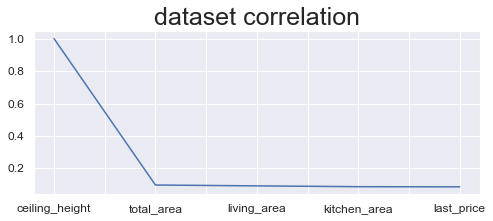

In [16]:
overview(5) # столбец с высотой потолков

В столбце довольно высокая доля пропущенных значений, но, к сожалению, в датасете нет никаких данных, которые могли бы косвенно указать на высоту потолков квартир (например, год постройки или тип/серия дома). Также отсутствует значительная корреляция с данными других столбцов. В связи с этим пропуски остануться без изменений. Также данные явно содержат аномалии - максимальное значение в 100м и минимальное в 1м явно выглядят неправдоподобно. Этот момент будет изучен подробнее во время исследовательского анализа данных. Предположительно наличие аномалий обусловлено тем, что данные этого столбца получены от пользователей напрямую, что могло привести к ошибкам ручного ввода. А пропуски присутствуют скорее всего потому, что данные являются необязательными для заполнения при подачи объявления.

Переходим к столбцу с количеством этажей в доме:

count   23,418.00
mean        10.62
std          6.57
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64
data type - float64

cells with missing data = 83
missing data share = 0.35%


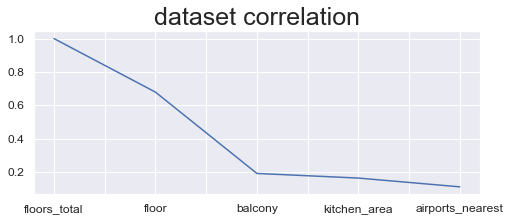

In [17]:
overview(6) # количество этажей в доме

Доля пропущенных значений составляет меньше 1%, они никак не повлияют на результаты исследования, но так как этажность дома может понадобится для дальнейших расчётов, мы удалим строки с пропущенными значениями, заодно поменяв тип данных:

In [18]:
data = data.loc[data['floors_total'].notna()] # пересохраним таблицу без пропусков в `floors_total`
data = into_int(6) # меняем тип данных
overview(6) # снова посмотрим на данные столбца

count   23,418.00
mean        10.62
std          6.57
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64
data type - int32


В остальном данные выглядят правдоподобно, перейдём к следующему столбцу:

count   21,559.00
mean        34.60
std         22.08
min          2.00
25%         18.70
50%         30.00
75%         42.50
max        409.70
Name: living_area, dtype: float64
data type - float64

cells with missing data = 1859
missing data share = 7.94%


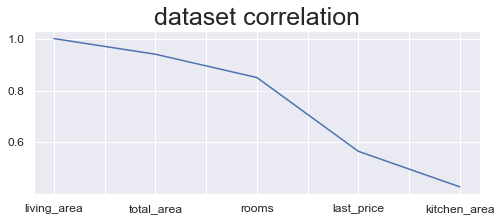

In [19]:
overview(7) # столбец с жилой площадью

В таблице отсутствует информация о размере жилой площади в около 8% объявлений. Это очень важный показатель для исследования, потому эти пропуски необходимо заполнить. Самый высокий коэффициент корреляции относиться к столбцу `total_area`, потому для заполнения пропусков можно сгруппировать данные по общей площади квартир и использовать медианое значение каждой группы:

count   23,285.00
mean        34.60
std         21.88
min          2.00
25%         18.70
50%         30.00
75%         42.40
max        409.70
Name: living_area, dtype: float64
data type - float64

cells with missing data = 133
missing data share = 0.57%


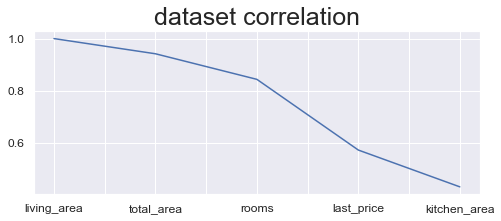

In [20]:
# группируем таблицу по общей площади, находим соответстующую медиану и используем её для заполнения пропусков


data['living_area'] = (
    data['living_area']
    .fillna(data.groupby('total_area')['living_area']
            .transform('median'))
)

overview(7) # смотрим на результат

Метод не сработал для 133 строк - скорее всего группы оказались слишком малы для поиска медианы. Так как таких данных меньше 1%, то их можно удалить без последствий для результатов исследования:

In [21]:
data = data.loc[data['living_area'].notna()] # пересохраним таблицу без пропусков в `living_area`
data = into_float(7) # меняем тип данных
overview(7) # снова посмотрим на данные столбца

count   23,285.00
mean        34.60
std         21.88
min          2.00
25%         18.70
50%         30.00
75%         42.40
max        409.70
Name: living_area, dtype: float64
data type - float32


Всё получилось! Пропуски заполнены, а медиана и среднее значения по столбцу остались на том же уровне. Переходим к следующему столбцу:

In [22]:
overview(8) # этаж дома, на котором расположена квартира

count   23,285.00
mean         5.85
std          4.85
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64
data type - int64


Данные выглядят правдоподобно. Поменяем данные на `int32`для экономии памяти и пойдём дальше:

In [23]:
data = into_int(8)

In [24]:
overview(9) # имеет ли квартира статус апартамента

count      2762
unique        2
top       False
freq       2713
Name: is_apartment, dtype: object
data type - object

cells with missing data = 20523
missing data share = 88.14%


В данном столце большая часть данных пропущена. Скорее всего квартиры с отсутствием данных в этом столбце не являются апартаментами. Это не распространённый тип жилья, особенно за пределами больших городов, потому малая доля значений `True` оправданна для данного столбца. Заменим пропущенные значения столбца на `False`:

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)
overview(9)

count     23285
unique        2
top       False
freq      23236
Name: is_apartment, dtype: object
data type - bool


Теперь данные столбца отображаются как `bool` - значит всё корректно. Переходим дальше:

In [26]:
overview(10) # тип планировки "студия"

count     23285
unique        2
top       False
freq      23274
Name: studio, dtype: object
data type - bool


Данные выглядят хорошо, переходим дальше:

In [27]:
overview(11) # открытая планировка

count     23285
unique        2
top       False
freq      23277
Name: open_plan, dtype: object
data type - bool


Тут также всё в порядке.

count   21,292.00
mean        10.54
std          5.87
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64
data type - float64

cells with missing data = 1993
missing data share = 8.56%


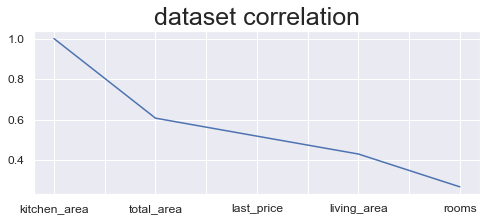

In [28]:
overview(12)

В столбце пропущено больше 8% значений. Эти данные, как и жилая площадь, имеют большое значение для исследования, потому пропущенные значения необходимо обработать. Мы используем тот же метод, что и для жилой площади - сгруппируем данные по жилой площади, найдём медианное значение в каждой группе и используем её для заполнения пропусков. Несмотря на умеренный уровень корелляции с данными столбца `total_area`, это метод будет самым точным из возможных в данной ситуации.

count   23,198.00
mean        10.46
std          5.75
min          1.30
25%          7.00
50%          9.00
75%         11.83
max        112.00
Name: kitchen_area, dtype: float64
data type - float64

cells with missing data = 87
missing data share = 0.37%


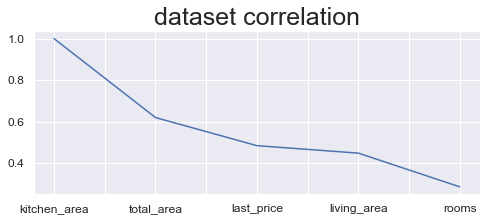

In [29]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
# группируем таблицу по общей площади, находим соответстующую медиану и используем её для заполнения пропусков

overview(12) # смотрим на результат

Метод не сработал для 87 строк - скорее всего группы оказались слишком малы для поиска медианы. Так как таких данных меньше 1%, то их можно удалить без последствий для результатов исследования:

In [30]:
data = data.loc[data['kitchen_area'].notna()] # пересохраним таблицу без пропусков в `floors_total`
data = into_float(12) # меняем тип данных
overview(12) # снова посмотрим на данные столбца

count   23,198.00
mean        10.46
std          5.75
min          1.30
25%          7.00
50%          9.00
75%         11.83
max        112.00
Name: kitchen_area, dtype: float64
data type - float32


Медиана и среднее остались примерно на том же уровне, пропуски заполнены. Переходим к следующему столбцу:

count   11,914.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64
data type - float64

cells with missing data = 11284
missing data share = 48.64%


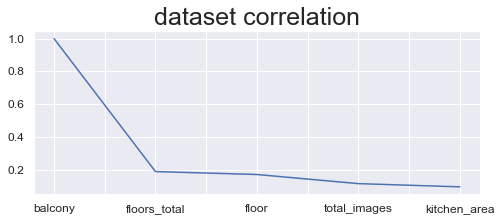

In [31]:
overview(13) # наличие балкона

В таблице пропущенна почти половина значений. Уровень медианы и среднего значения говорит о том, что у большинства квартир имеется только один балкон - скорее всего в объявлениях с пропусками в этом столбце просто отсутствуют балконы. Заполним пропуски значением `0`:

In [32]:
data['balcony'] = data['balcony'].fillna(0) # заполняем пропуски
data = into_int(13) # меняем тип данных
overview(13) # снова выводим статистику

count   23,198.00
mean         0.59
std          0.96
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          5.00
Name: balcony, dtype: float64
data type - int32


Переходим к следующему столбцу:

In [33]:
overview(14)

count               23150
unique                362
top       Санкт-Петербург
freq                15395
Name: locality_name, dtype: object
data type - object

cells with missing data = 48
missing data share = 0.21%


В столбце пропущено меньше 0.5% значений, соответственно их можно удалить без последствий для исследования. Данные хранятся в виде строк, потому на всякий случай выведем список уникальных значений для исключения наличия дубликатов:

In [34]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

При первичном осмотре видно много дубликатов из-за написания слова `посёлок` через буквы `ё` и `е`. Также используются равные понятия `городской посёлок` и `посёлок городского типа`. Сделаем соответствующие замены:

In [35]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
# заменяем данные

data = data.loc[data['locality_name'].notna()] # пересохраним таблицу без пропусков в `locality_name`

overview(14)
data['locality_name'].sort_values().unique()

count               23150
unique                321
top       Санкт-Петербург
freq                15395
Name: locality_name, dtype: object
data type - object


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

После замен количество уникальных значений уменьшилось с 365 до 321. Других дубликатов не обнаружено.
Возможно для исследования нам пригодится понимание того, к какому типу местности относится объявление. Создадим в таблице новый столбец `locality_type` и категоризуем в нём данные столбца `locality_name`: 

In [36]:
def loc_type(name): # напишем функцию для присвоения категории в соответствии с типом поселения
    
    if 'Санкт-Петербург' in name:
        return 'city' # категория для СПБ
    if 'поселок' in name:
        return 'settlement' # поселок
    if 'садов' in name or 'деревня' in name or 'село' in name:
        return 'other' # село, деревня или СНТ
    else:
        return 'town' # город(кроме СПБ)

# функция loc_type анализирует строки на наличие заданных совпадений и возвращает соответствующую категорию
    
# попробуем функцию на срезе списка уникальных значений locality_name   
try: 
    locality_unique = data['locality_name'][50:75].unique()
    
    for locality in locality_unique:
        display(f'Поселение "{locality}", относится к категории "{loc_type(locality)}"')    
        
except:
    display('Функция не сработала')

'Поселение "Пушкин", относится к категории "town"'

'Поселение "Санкт-Петербург", относится к категории "city"'

'Поселение "поселок Парголово", относится к категории "settlement"'

'Поселение "поселок Шушары", относится к категории "settlement"'

'Поселение "поселок Мурино", относится к категории "settlement"'

'Поселение "Сертолово", относится к категории "town"'

'Поселение "Гатчина", относится к категории "town"'

'Поселение "Ломоносов", относится к категории "town"'

'Поселение "деревня Федоровское", относится к категории "other"'

'Поселение "Выборг", относится к категории "town"'

'Поселение "Кронштадт", относится к категории "town"'

'Поселение "Колпино", относится к категории "town"'

Функция сработала! Применем её ко всему столбцу `locality_name` и создадим новый столбец с результатами `locality_type`:

In [37]:
data['locality_type'] = data['locality_name'].apply(loc_type) # создаём столбец с результатами работы функции
data.columns # выводим список колонок

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'locality_type'],
      dtype='object')

In [38]:
data = data.reindex(columns=['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'locality_type', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']) 
# зададим новый порядок столбцов, чтобы столбец `locality_type` шёл сразу после `locality_name`

col = data.columns.tolist() # пересохраним переменную со списком столбцов для работы функции `overview`
data.sample(10).T # взглянем на обновлённый датасет

,18567,20411,20634,307,21974,7171,8492,16874,19384,18906
total_images,13,10,10,20,11,9,3,20,9,3
last_price,2100000,6500000,4600000,5350000,8900000,6500000,7445866,5600000,3200000,7300000
total_area,55.00,45.00,44.00,65.00,114.00,70.00,53.80,52.30,27.30,76.00
first_day_exposition,2017-06-10 00:00:00,2016-05-26 00:00:00,2014-11-27 00:00:00,2018-07-09 00:00:00,2018-11-08 00:00:00,2018-10-17 00:00:00,2018-07-24 00:00:00,2018-05-16 00:00:00,2018-09-29 00:00:00,2016-06-17 00:00:00
rooms,2,2,1,2,4,3,2,2,1,3
ceiling_height,2.60,3.10,NaN,2.78,2.65,2.65,NaN,2.65,2.55,NaN
floors_total,5,6,22,25,9,12,25,12,12,22
living_area,31.50,25.00,20.00,30.00,70.50,44.50,25.30,31.00,15.30,43.00
floor,5,5,19,9,2,11,12,4,12,2
is_apartment,False,False,False,False,False,False,False,False,False,False


Всё получилось. Переходим к следующему столбцу:

In [39]:
overview(15) # тип поселения (новый столбец)

count     23150
unique        4
top        city
freq      15395
Name: locality_type, dtype: object
data type - object


Столбец может помочь в исследовании в качестве дополнительного параметра группировки данных или расчёта корреляции внутри определенного типа поселения.

Переходим дальше:

count   17,774.00
mean    28,807.92
std     12,640.29
min          0.00
25%     18,557.00
50%     26,765.00
75%     37,271.75
max     84,869.00
Name: airports_nearest, dtype: float64
data type - float64

cells with missing data = 5376
missing data share = 23.22%


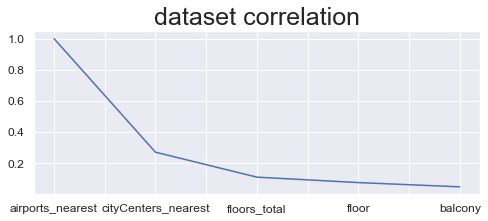

In [40]:
overview(16) # расстояние до ближайшего аэропорта

Сразу бросается в глаза минимальное значение - вряд ли существует квартира, находящяяся в 0м от ближайшего аэропорта. Посмотрим на эти данные:

In [41]:
data[data['airports_nearest'] < 500] # выведем квартиры с расстоянием меньше 500м от ближайшего аэропорта

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,locality_type,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21084,0,7000000,34.70,2018-09-23,1,2.70,9,19.80,3,False,...,2,Санкт-Петербург,city,0.00,"22,801.00",0.00,NaN,0.00,NaN,60.00


Всего одно такое объявление - скорее всего ошибка ручного ввода. В данной ситуации `0` можно воспринимать как пропущенное значение, можно отбросить эту строку.

Всего в столбце пропущено 23% данных, косвенных параметров для заполнения значений в датасете нет, как и значительной корреляции с данными других столбцов. Наличие пропусков скорее всего также обусловлено тем, что данные являются необязательными для заполнения при подачи объявления. Попробуем использовать новый столбец `locality_type` и посчитаем корреляцию в разрезе типов поселений:

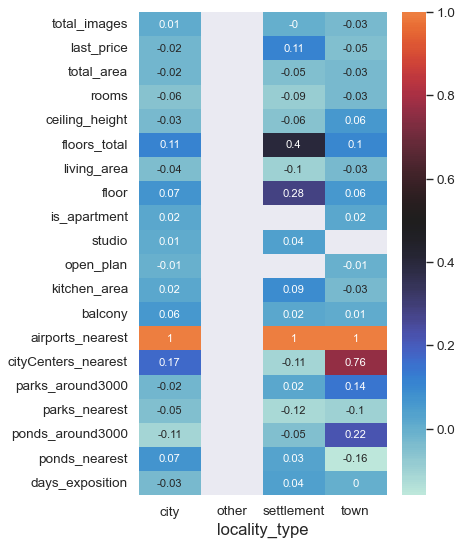

In [42]:
loc_corr = round(data.groupby('locality_type').corrwith(data['airports_nearest']).T, 2)
plt.figure(figsize=(5,8), dpi= 80)
sns.heatmap(loc_corr, center = 0.5, annot=True) 
plt.show()

# проверим корреляцию по группам поселений через тепловую карту

Коээфициент общей корреляция столбцов `cityCenters_nearest` и `airports_nearest` составляет около 0.3, но при этом в разрезе городов (`locality_type` == `city`) это показатель намного выше - 0.76. Проверим, сколько данных по ближайшим аэропортам пропущенно в объявлениях в городах (кроме СПБ):

In [43]:
no_airport = data[data['airports_nearest'].isna()] # данные с пропусками в аэропортах во всех поселениях
towns_with_no_airport = data[(data['airports_nearest'].isna()) & (data['locality_type'] == 'town')] # те же данные в городах

print(f'В объявлениях в городах (кроме СПБ) не указано расстояние до аэропорта в \
{len(towns_with_no_airport)} объявлениях. Это {round(len(towns_with_no_airport)/len(no_airport)*100, 2)}% от \
всех пропусков в этом столбце.')

В объявлениях в городах (кроме СПБ) не указано расстояние до аэропорта в 2693 объявлениях. Это 50.09% от всех пропусков в этом столбце.


Высокий уровень корреляции данных мог бы позволить нам заполнить половину пропущенных значений с помощью медианы, расчитанной после группировки объявлений в городах по столбцу с расстоянием до центра. Но, к сожалению, большинство значений этого столбца уникальны, что не позволяет использовать эти данные для группировки. Другими словами - в этой ситуации у нас нет возможности использовать высокую корреляцию данных для заполнения пропущенных значений. 

При этом по какой-то причине корреляция не отображается вовсе для некоторых типов поселений - попробуем посмотреть на пропущенные значения в таблице в разрезе столбца `locality_type`:

,city,town,settlement,other
total_images,0.00,0.00,0.00,0.00
last_price,0.00,0.00,0.00,0.00
total_area,0.00,0.00,0.00,0.00
first_day_exposition,0.00,0.00,0.00,0.00
rooms,0.00,0.00,0.00,0.00
ceiling_height,35.26,41.07,48.50,45.49
floors_total,0.00,0.00,0.00,0.00
living_area,0.00,0.00,0.00,0.00
floor,0.00,0.00,0.00,0.00
is_apartment,0.00,0.00,0.00,0.00


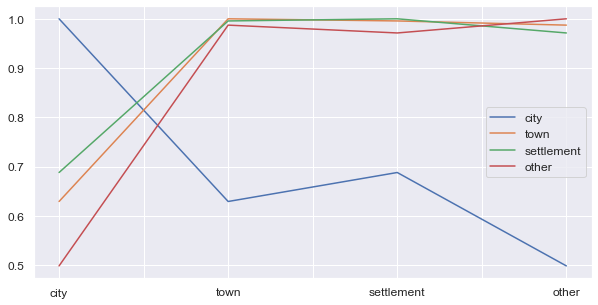

In [44]:
loc_list = ['city','town','settlement','other'] # список типов поселений для аргумента функции

def na_share(name): # напишем функцию для расчёта доли пропусков
    na = data[data['locality_type'] == name].isna().sum()
    notna = data[data['locality_type'] == name].notna().sum()
    nashare = na/(notna+na)*100
    return nashare

def locality_type_na(list):  # делаем таблицу из результатов работы функции na_share
    na_table = (
        pd.concat([na_share(list[0]),na_share(list[1]),na_share(list[2]),
        na_share(list[3])], axis=1, keys=list)
    )
    return na_table

display(locality_type_na(loc_list)) # смотрим на пропуски
locality_type_na(loc_list).corr().plot(grid=True, figsize=[10,5]) # визуализируем корреляцию пропусков друг с другом
plt.show()

На таблице видно, что доля пропущенных значений очень отличается в зависимости от типа поселений - в категории `other`, например, пропущенно 100% значений не только в столбце с расстоянием до аэропорта, но в столцах с информацией о парках, прудах и расстоянии до центра города. В категориях `town` и `settlement` в этих столбцах пропущено больше половины значений, а вот в категории объявлений из СПБ `city` наоборот - большая часть данных указана, за исключением `parks_nearest` и `ponds_nearest`. График показывает нам, что корреляция первых трёх категорий практически совпадает - скорее всего значения пропущены по одной и той же причине. Предположительно для поселений вне крупных городов информация о близости аэропорта или центра города не настолько актуальна, и потому форма для заполнения информации при подачи объявления отлична от городов вроде СПБ.


In [45]:
locality_type_na(loc_list).loc['airports_nearest'] # рассмотрим поближе пропуски столбца с расстоянием до аэропорта

city           0.53
town          63.48
settlement    64.40
other        100.00
Name: airports_nearest, dtype: float64

Данные с пропусками в категории `city` можно отбросить, остальные пропуски оставляем как есть.
Заодно избавимся от строчки с расстоянием 0м до аэропорта, выявленной ранее:

In [46]:
data.loc[data['locality_type'] == 'city', ['airports_nearest']] \
= data.loc[data['locality_type'] == 'city', ['airports_nearest']].fillna(0)
# заполняем пропуски нулём

data = data[data['airports_nearest'] != 0] # пересохраняем датасет

count   17,773.00
mean    28,809.54
std     12,638.80
min      6,450.00
25%     18,557.00
50%     26,765.00
75%     37,273.00
max     84,869.00
Name: airports_nearest, dtype: float64
data type - float64

cells with missing data = 5295
missing data share = 22.95%


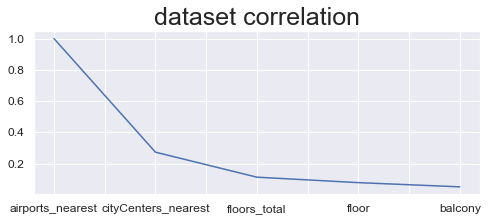

In [47]:
overview(16) # снова выводим информацию о таблице

In [48]:
#напоследок посмотрим, как изменилось общее количество пропусков в разрезе типов поселений
locality_type_na(loc_list)

,city,town,settlement,other
total_images,0.00,0.00,0.00,0.00
last_price,0.00,0.00,0.00,0.00
total_area,0.00,0.00,0.00,0.00
first_day_exposition,0.00,0.00,0.00,0.00
rooms,0.00,0.00,0.00,0.00
ceiling_height,35.25,41.07,48.50,45.49
floors_total,0.00,0.00,0.00,0.00
living_area,0.00,0.00,0.00,0.00
floor,0.00,0.00,0.00,0.00
is_apartment,0.00,0.00,0.00,0.00


Мы удалили пропуски столбца `airports_nearest`, но при этом видно, что они также полностью пропали в столбцах `city_Centers_nearest`, `parks_around3000` и `ponds_around3000` - явно значения были пропущенны в одних и тех же столбцах. Уже сейчас можно сделать вывод, что объявления из СПБ обладают наиболее полной информацей об объекте недвижимости, что лишний раз указывает на вероятность того, что в зависимости от города/типа поселения продавцам квартир предлагается указать отличные от друг друга наборы данных с информацией о квартире. 

count   17,772.00
mean    14,217.65
std      8,643.52
min        181.00
25%      9,241.00
50%     13,107.00
75%     16,285.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64
data type - float64

cells with missing data = 5296
missing data share = 22.96%


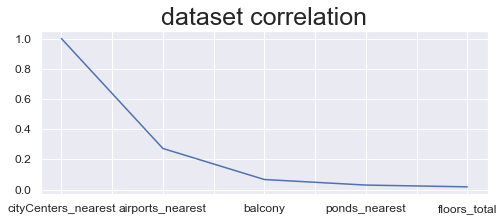

city           0.00
town          63.51
settlement    64.40
other        100.00
Name: cityCenters_nearest, dtype: float64

In [49]:
overview(17) # столбец с расстоянием до центра
locality_type_na(loc_list).loc['cityCenters_nearest'] # доля пропусков в разрезе типов поселений

Ситуация с этим столбцом не отличается от предыдущего - пропущенно 23% данных, косвенных параметров для заполнения значений в датасете нет, как и значительной общей корреляции с данными других столбцов. Наличие пропусков скорее всего также обусловлено тем, что данные являются необязательными для заполнения при подачи объявления. 

Мы уже знаем о высокой корелляции с данными о расстоянии до аэропорта в объявлениях в городах (кроме СПБ) и об отсутствии пропущенных значений в объявления из СПБ, но тут мы также никак не можем это использовать. Оставляем значения как есть и переходим к следующему столбцу:

count   17,773.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around3000, dtype: float64
data type - float64

cells with missing data = 5295
missing data share = 22.95%


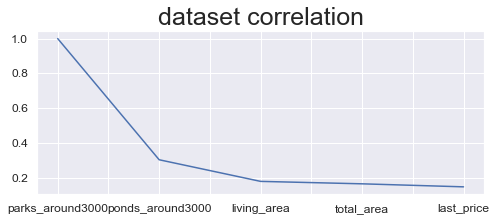

city           0.00
town          63.48
settlement    64.40
other        100.00
Name: parks_around3000, dtype: float64

In [50]:
overview(18) # количество парков в радиусе 3км
locality_type_na(loc_list).loc['parks_around3000'] # доля пропусков в разрезе типов поселений

Ситуция абсолютно идентична последним нескольким столбцам. Можно предположить, что пропуски в этом столбце указывают на отсутствие парков в заданном радиусе, что позволило бы заполнить пропуски значением `0`. Но поскольку количество пропусков и их распределение по типам поселений полностью совпадают с показателями предыдущих столбцов, такой способ не подходит - данные просто не указаны или пропущенны по той же причине, что и в предыдущих столбцах. Оставляем значения как есть и переходим дальше.

count   7,911.00
mean      489.74
std       340.36
min         1.00
25%       288.00
50%       454.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64
data type - float64

cells with missing data = 15157
missing data share = 65.71%


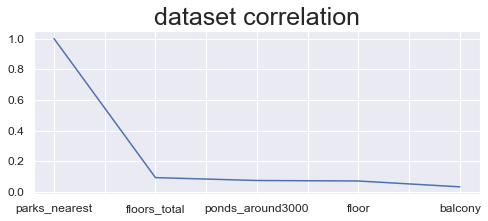

city          53.41
town          82.37
settlement    98.91
other        100.00
Name: parks_nearest, dtype: float64

In [51]:
overview(19) # расстояние до ближайшего парка
locality_type_na(loc_list).loc['parks_nearest'] # доля пропусков в разрезе типов поселений

Мы точно значем, что пропусков в данных категории `city` быть не должно, так как их нет в предыдушем столбце - раз есть парки в радиусе 3км, значит и должен быть ближайший. Заполним пропуски в этой категории медианым значением - в рамках одного города на основании даже половины данных этот показатель будет обладать высокой точностью.

count   16,089.00
mean       474.62
std        239.12
min          1.00
25%        458.00
50%        460.00
75%        460.00
max      3,190.00
Name: parks_nearest, dtype: float64
data type - float64

cells with missing data = 6979
missing data share = 30.25%


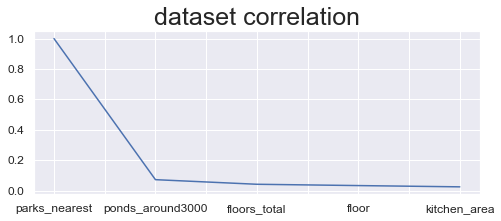

city           0.00
town          82.37
settlement    98.91
other        100.00
Name: parks_nearest, dtype: float64

In [52]:
data.loc[data['locality_type'] == 'city', ['parks_nearest']] \
= data.loc[data['locality_type'] == 'city', ['parks_nearest']]\
.fillna(data.loc[data['locality_type'] == 'city', ['parks_nearest']].median())
# заполняем пропуски для СПБ медианым значением

overview(19) # смотрим обновлённую статистику
locality_type_na(loc_list).loc['parks_nearest'] # проверим наличие пропусков

Таким образом получилось заполнить половину пропущенных значений. Остальные данные останутся как есть, переходим дальше:

count   17,773.00
mean         0.77
std          0.94
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: ponds_around3000, dtype: float64
data type - float64

cells with missing data = 5295
missing data share = 22.95%


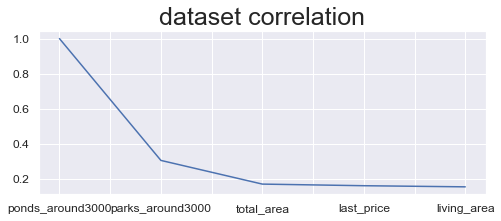

city           0.00
town          63.48
settlement    64.40
other        100.00
Name: ponds_around3000, dtype: float64

In [53]:
overview(20) # количество прудов в радиусе 3км
locality_type_na(loc_list).loc['ponds_around3000'] # проверим наличие пропусков в разрезе типов поселений

С прудами происходит явно то же самое, что и с парками. Оставляем данные как есть.

count   8,862.00
mean      519.22
std       277.96
min        13.00
25%       294.00
50%       504.00
75%       732.00
max     1,344.00
Name: ponds_nearest, dtype: float64
data type - float64

cells with missing data = 14206
missing data share = 61.58%


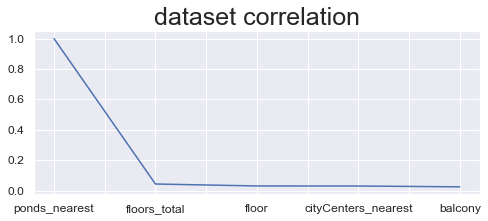

city          49.27
town          79.99
settlement    90.43
other        100.00
Name: ponds_nearest, dtype: float64

In [54]:
overview(21) # расстояние для ближайшего пруда
locality_type_na(loc_list).loc['ponds_nearest'] # проверим наличие пропусков в разрезе типов поселений

Аналогично - используем медиану для заполнения пропусков в `city`, остальное оставляем без изменений.

count   16,089.00
mean       474.62
std        239.12
min          1.00
25%        458.00
50%        460.00
75%        460.00
max      3,190.00
Name: parks_nearest, dtype: float64
data type - float64

cells with missing data = 6979
missing data share = 30.25%


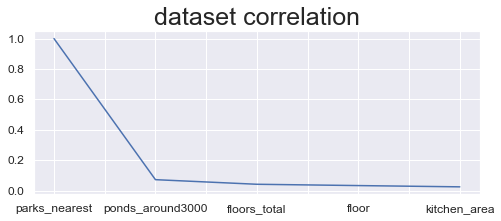

city           0.00
town          79.99
settlement    90.43
other        100.00
Name: ponds_nearest, dtype: float64

In [55]:
data.loc[data['locality_type'] == 'city', ['ponds_nearest']] \
= data.loc[data['locality_type'] == 'city', ['ponds_nearest']]\
.fillna(data.loc[data['locality_type'] == 'city', ['ponds_nearest']].median())
# заполняем пропуски для СПБ медианым значением

overview(19) # смотрим обновлённую статистику
locality_type_na(loc_list).loc['ponds_nearest'] # проверим наличие пропусков

count   19,968.00
mean       181.61
std        220.02
min          1.00
25%         45.00
50%         96.00
75%        233.00
max      1,580.00
Name: days_exposition, dtype: float64
data type - float64

cells with missing data = 3100
missing data share = 13.44%


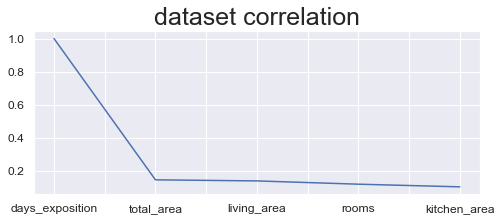

In [56]:
overview(22) # последний столбец - количество дней от публикации до снятия объявления

Поскольку эти данные скорее всего считаются автоматически, наличие пропусков обусловлено тем, что объявления были актуальны на момент выгрузки датасета, потому не было даты снятия публикации для расчёта количества дней.

### Вывод

Сделаем краткий обзор данных для первоначального и измененного в ходе обработки датасетов:

In [57]:
original.info() # "сырой" датасет
original.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [58]:
data.info() # после предобработки данных
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23068 non-null  int32         
 1   last_price            23068 non-null  int32         
 2   total_area            23068 non-null  float32       
 3   first_day_exposition  23068 non-null  datetime64[ns]
 4   rooms                 23068 non-null  int32         
 5   ceiling_height        14253 non-null  float64       
 6   floors_total          23068 non-null  int32         
 7   living_area           23068 non-null  float32       
 8   floor                 23068 non-null  int32         
 9   is_apartment          23068 non-null  bool          
 10  studio                23068 non-null  bool          
 11  open_plan             23068 non-null  bool          
 12  kitchen_area          23068 non-null  float32       
 13  balcony         

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          8815
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
locality_type              0
airports_nearest        5295
cityCenters_nearest     5296
parks_around3000        5295
parks_nearest           6979
ponds_around3000        5295
ponds_nearest           6661
days_exposition         3100
dtype: int64

In [59]:
na_diff = round((original.isna().sum().sum()-data.isna().sum().sum())/original.isna().sum().sum()*100, 2)
size_diff = round((len(original)-len(data))/len(original)*100, 2) # разница в количестве строк
memory_diff = round((3.7-3)/3*100, 2)


print(f'В ходе предобработки данных было обработано {na_diff}% пропущенных значений. \
Было удалено {size_diff}% датасета, при этом удалось \n сократить использование памяти на {memory_diff}%.')

В ходе предобработки данных было обработано 53.93% пропущенных значений. Было удалено 2.66% датасета, при этом удалось 
 сократить использование памяти на 23.33%.


В изначальном датасете больше половины столбцов содержали пропущенные значения. При детальном рассмотрении выяснилось, что в части из них доля пропусков в среднем составлял около 0.5%, что не может повлиять на результаты исследования, в связи с чем данные были удалены.

Для заполнения остальных пропущенных значений чаще всего был использован метод расчёта медианных значений группированных дат на основе их корреляции. Но, к сожалению, не для всех значений имелись необходимыв для подобного метода данных, в связи с чем датасет всё еще содержит пропущенные значения в некоторых столцах. Предположительно наличие пропусков обусловлено тем, что данные этого столбца получены от пользователей напрямую, что могло привести к ошибкам ручного ввода. Также возможен вариант, что данные являются необязательными для заполнения при подачи объявления. 

В ходе предобработки к столбцу с названиями населённых пунктов был применён метод категоризации, что стало хорошей опцией для дополнительной группировки данных. Таким образом удалось выяснить, что доля пропущенных значений очень отличается в зависимости от типа поселений - в небольших населенных пунктах, например, пропущенно 100% значений столбце с расстоянием до аэропорта, с информацией о парках, прудах и расстоянии до центра города. В категориях более крупных населённых пунктах в этих столбцах пропущено больше половины значений, а вот в категории объявлений из СПБ наоборот - большая часть данных указана. Визуализация этих пропусков показала, что корреляция первых трёх категорий практически совпадает - скорее всего значения пропущены по одной и той же причине. Предположительно для поселений вне крупных городов информация о близости аэропорта или центра города не настолько актуальна. Объявления из СПБ явно обладают наиболее полной информацей об объекте недвижимости, что лишний раз указывает на вероятность того, что в зависимости от города/типа поселения продавцам квартир предлагается указать отличные от друг друга наборы данных с информацией о квартире. Если же эти данные получены не от пользователей, а расчитаны автоматически - это явно указывает на то, что системе хватает ресурсов делать полноценные расчёты только в черте крупных поселений.


## Расчёты и добавление результатов в таблицу

Для проведения исследовательского анализа данных нам необходимо добавить несколько дополнительных столбцов в таблицу:
 
1. Цена квадратного метра.
2. День недели, месяц и год публикации объявления.
3. Этаж квартиры (первый, последний, другой)
4. Соотношение жилой и общей площади
5. Отношение площади кухни к общей.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23068 non-null  int32         
 1   last_price            23068 non-null  int32         
 2   total_area            23068 non-null  float32       
 3   first_day_exposition  23068 non-null  datetime64[ns]
 4   rooms                 23068 non-null  int32         
 5   ceiling_height        14253 non-null  float64       
 6   floors_total          23068 non-null  int32         
 7   living_area           23068 non-null  float32       
 8   floor                 23068 non-null  int32         
 9   is_apartment          23068 non-null  bool          
 10  studio                23068 non-null  bool          
 11  open_plan             23068 non-null  bool          
 12  kitchen_area          23068 non-null  float32       
 13  balcony         

In [61]:
data['price_per_square'] = data['last_price'] / data['total_area'] # цена за квадратный метр
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday # день недели публикации
data['first_day_month'] = data['first_day_exposition'].dt.month # месяц публикации
data['first_day_year'] = data['first_day_exposition'].dt.year # год публикации

In [62]:
def floor_type(data): # напишем функцию для присвоения категории в соответствии с этажом
    
    floor = data['floor']
    floors_total = data['floors_total']
    
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    else:
        return 'other'
    
data['floor_type'] = data.apply(floor_type, axis=1) # добавляем столбец с результатом работы функции

In [63]:
data['living_area_ratio'] = data['living_area']/data['total_area'] # cоотношение жилой и общей площади
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area'] # отношение площади кухни к общей

In [64]:
data.info() # выведем общую информацию
data.sample(10).T # посмотрим на кусочек обновленного датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23068 non-null  int32         
 1   last_price            23068 non-null  int32         
 2   total_area            23068 non-null  float32       
 3   first_day_exposition  23068 non-null  datetime64[ns]
 4   rooms                 23068 non-null  int32         
 5   ceiling_height        14253 non-null  float64       
 6   floors_total          23068 non-null  int32         
 7   living_area           23068 non-null  float32       
 8   floor                 23068 non-null  int32         
 9   is_apartment          23068 non-null  bool          
 10  studio                23068 non-null  bool          
 11  open_plan             23068 non-null  bool          
 12  kitchen_area          23068 non-null  float32       
 13  balcony         

,13974,4292,9829,10703,11284,12689,23039,2515,4893,4997
total_images,19,5,4,18,0,6,11,11,13,9
last_price,6990000,8000000,2450000,5400000,1950000,4990000,2600000,14900000,2650000,5800000
total_area,65.00,57.00,55.00,52.00,37.00,60.90,72.00,120.00,29.70,66.40
first_day_exposition,2018-10-06 00:00:00,2019-02-18 00:00:00,2018-07-27 00:00:00,2017-08-11 00:00:00,2019-03-20 00:00:00,2017-09-27 00:00:00,2017-12-04 00:00:00,2016-04-29 00:00:00,2019-04-22 00:00:00,2016-04-29 00:00:00
rooms,2,2,3,2,1,3,4,3,1,3
ceiling_height,NaN,3.00,2.50,NaN,25.00,NaN,NaN,NaN,2.55,2.60
floors_total,35,5,5,17,5,12,5,9,5,9
living_area,32.10,35.00,32.00,34.00,17.00,41.50,48.00,64.00,15.50,41.60
floor,23,4,1,3,4,11,2,6,4,5
is_apartment,False,False,False,False,False,False,False,False,False,False


## Исследовательский анализ данных

### Изучение параметров

Первым шагом анализа станет подробное изучение следующих параметров: площадь, цена, число комнат, высота потолков, а также время продажи квартиры.

In [65]:
eda = data # сохраним отдельный датасет для исследовательского анализа данных

def eda_overview(data): # функция для вывода описательной статистики и диаграммы размаха 
    
    eda[data].plot(kind='hist', bins=100, figsize=[10,4], grid=True, legend=True, use_index=True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    eda.boxplot(data, figsize=[4,10])
    plt.show()
    display(eda[data].describe())

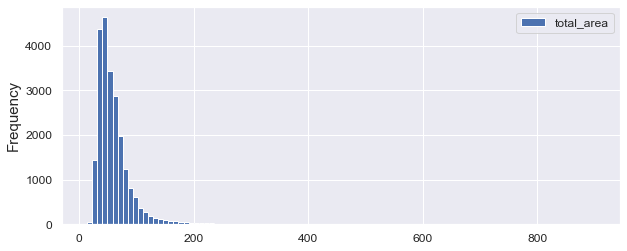

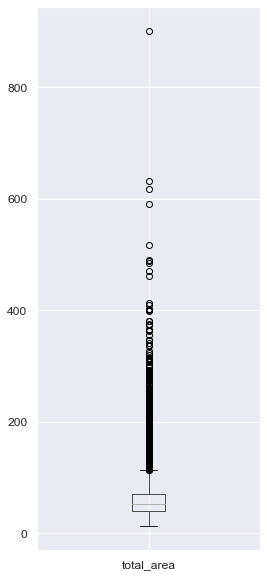

count   23,068.00
mean        60.23
std         33.96
min         14.00
25%         40.30
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

In [66]:
# начнём с общей площади

eda_overview('total_area')

На графика видно много редких значений и выбросов в сторону увеличения площади. В статистике также видна огромная разница между третьим квартилем и максимальным значением - максимум выше большем чем в 10 раз. Попробуем сделать проанализировать срез данных до 100м:

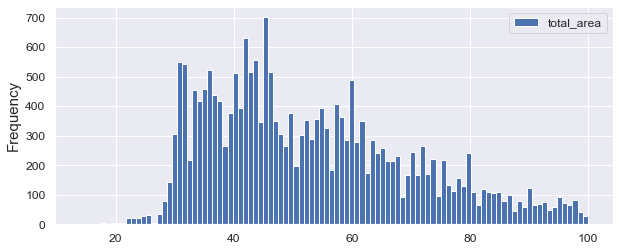

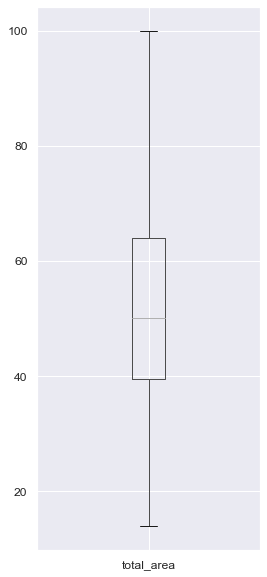

count   21,254.00
mean        53.06
std         17.19
min         14.00
25%         39.42
50%         50.00
75%         64.00
max         99.90
Name: total_area, dtype: float64

In [67]:
eda = eda[eda['total_area'] < 100] # убираем данные квартир площадью больше 100м
eda_overview('total_area')

На диаграмме размаха больше нет выбросов, но распределение значений по гистограмме уже совсем не похоже на нормальное - много пиковых значений и провал посередине. На уровне площади 30м происходит резкий скачок вверх, меньшая площадь представлена значительно реже. Построим график в пределах нормальных значений диаграммы размаха, для близкого рассмотрения серединных данных:

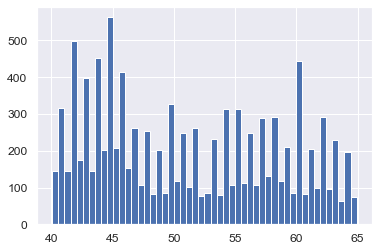

In [68]:
eda.query('40 < total_area < 65')['total_area'].hist(bins=50)
plt.show()

Тут мы видим большое количество пиковых значений, данные распределены неравномерно. 

Удалим из данных для анализа квартиры площадью менее 30м ("тонкий" хвост предыдущей гистограммы) и перейдём к анализу следующего параметра:

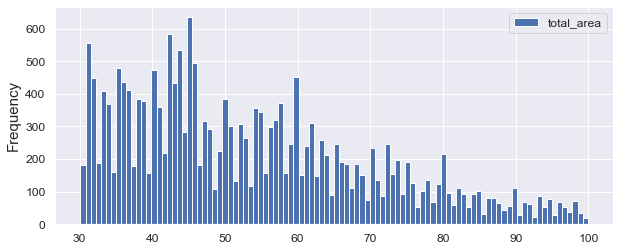

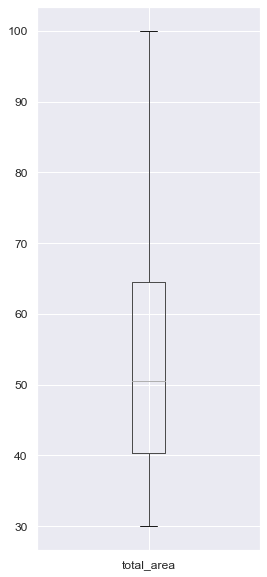

count   20,599.00
mean        53.86
std         16.85
min         30.10
25%         40.40
50%         50.50
75%         64.50
max         99.90
Name: total_area, dtype: float64

In [69]:
eda = eda[eda['total_area'] > 30] # убираем данные квартир площадью менее 30м
eda_overview('total_area')

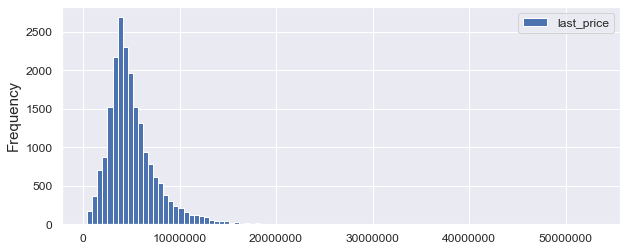

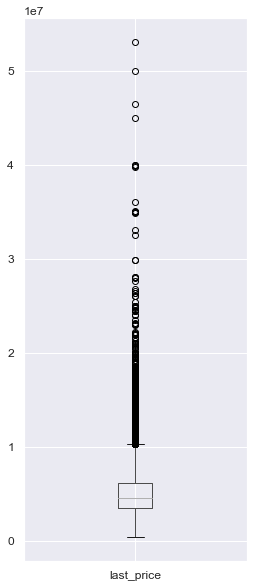

count       20,599.00
mean     5,152,526.58
std      2,932,496.36
min        430,000.00
25%      3,445,000.00
50%      4,500,000.00
75%      6,167,500.00
max     53,000,000.00
Name: last_price, dtype: float64

In [70]:
eda_overview('last_price') #данные с ценой продажи квартиры

Большая часть данных стремится к нормальному распределению, но также присутствует большое количество выбросов (стоимость больше ~10,000,000). Уберём эти данные из таблицы и рассмотрим оставшиеся поближе:

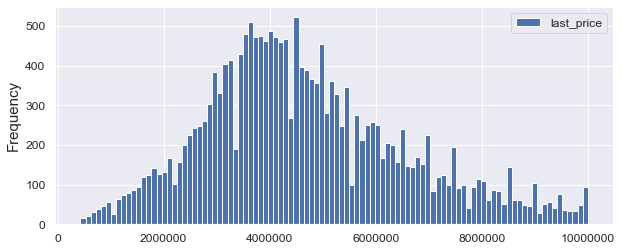

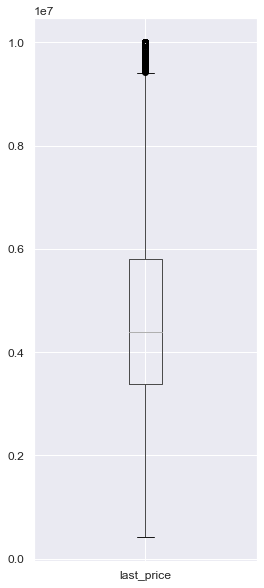

count       19,506.00
mean     4,679,263.93
std      1,912,793.21
min        430,000.00
25%      3,390,000.00
50%      4,400,000.00
75%      5,800,000.00
max     10,000,000.00
Name: last_price, dtype: float64

In [71]:
eda = eda[eda['last_price'] <=10000000]
eda_overview('last_price') #данные с ценой продажи квартиры

График всё ещё визуально напоминает нормальное распределение, но видно множество провалов. Диаграмма распределения теперь отображает выбросы в значениях чуть больше 9,000,000 - избавимся от них и перейдём к следующему параметру:

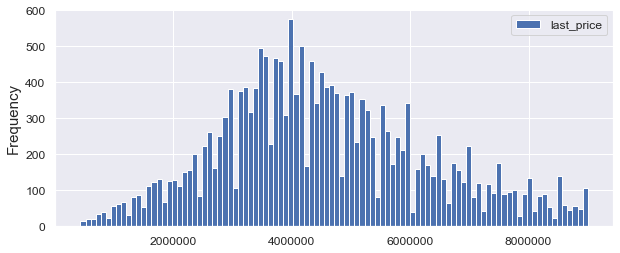

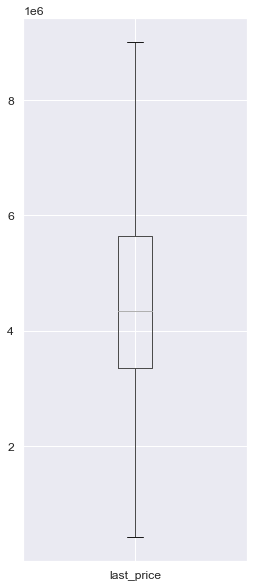

count      19,003.00
mean    4,549,647.14
std     1,761,171.31
min       430,000.00
25%     3,350,000.00
50%     4,350,000.00
75%     5,650,000.00
max     9,000,000.00
Name: last_price, dtype: float64

In [72]:
eda = eda[eda['last_price'] <= 9000000]
eda_overview('last_price')

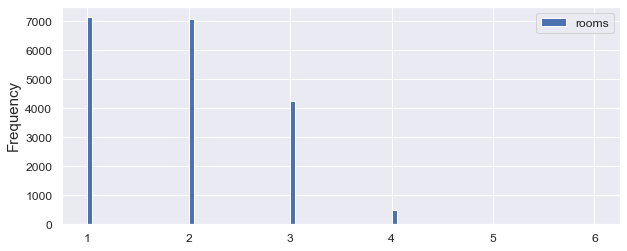

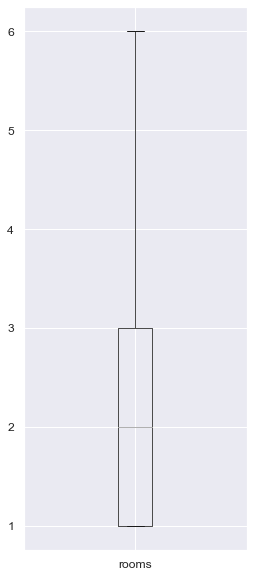

count   19,003.00
mean         1.91
std          0.84
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

In [73]:
eda_overview('rooms') # число комнат

Квартиры с количеством комнат больше трёх встречаются значительно реже, чем все остальные. Диаграмма размаха также захватывает в бокс нормальных значений только квартиры с одной, двумя или тремя комнатами. Уберём остальные из данных:

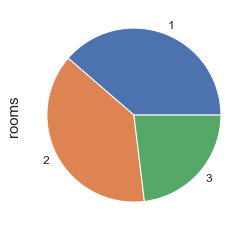

In [74]:
eda = eda[eda['rooms'] <= 3]

eda['rooms'].value_counts().plot.pie() # посмотрим на данные в виде круговой диаграммы
plt.show()

Оказалось что в наших данных количество однокомнатных и двухкомнатных квартир практически одинаковое.

Переходим к следующему параметру:

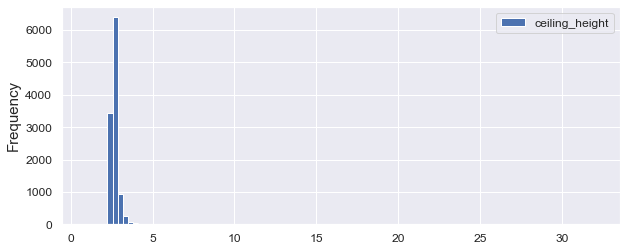

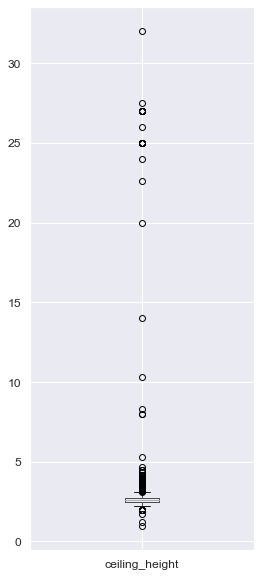

count   11,178.00
mean         2.71
std          0.99
min          1.00
25%          2.50
50%          2.60
75%          2.75
max         32.00
Name: ceiling_height, dtype: float64

In [75]:
eda_overview('ceiling_height') # высота потолков

Ещё на этапе предобработки данных в этом столбце было выявлено много аномалий - слишком маленькое минимальное значение и слишком большое макисимальное, а также много пропусков. Начнём с ограничения высоты потолка до 5м:

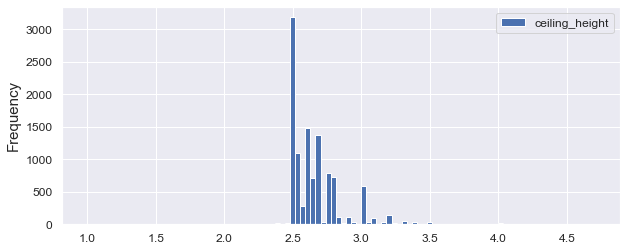

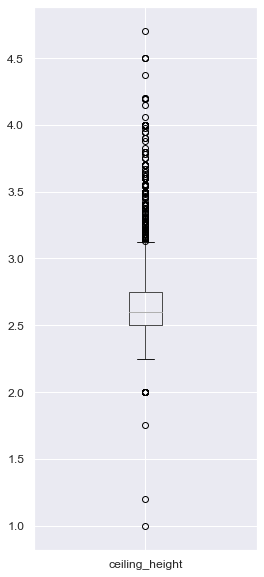

count   11,153.00
mean         2.67
std          0.21
min          1.00
25%          2.50
50%          2.60
75%          2.75
max          4.70
Name: ceiling_height, dtype: float64

In [76]:
eda = eda[eda['ceiling_height'] <= 5]
eda_overview('ceiling_height')

Согласно нормам законодательства РФ, минимальная высота потолков в жилых помещениях не может быть меньше 2.5 метров.

(**Строительные нормы и правила Российской Федерации** https://docs.cntd.ru/document/456054198).

Значения ниже этого показателя можно считать аномальными. Также диаграмма размаха показывает выбросы в квартирах с потолками выще ~3м - сделаем правки в датасете в соответствии с этим:

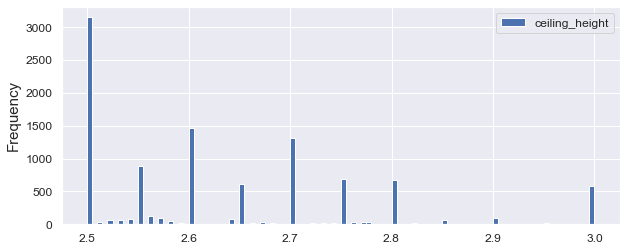

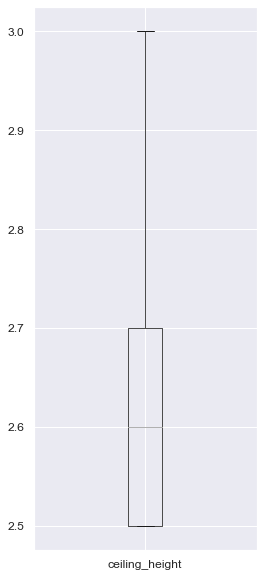

count   10,533.00
mean         2.63
std          0.14
min          2.50
25%          2.50
50%          2.60
75%          2.70
max          3.00
Name: ceiling_height, dtype: float64

In [77]:
eda = eda[eda['ceiling_height'] <= 3]
eda = eda[eda['ceiling_height'] >= 2.5]

eda_overview('ceiling_height')

Большая часть квартир имеет высоту 2.5 метров, что соответствует минимально разрешённой высоте жилого помещения в РФ. Нормальные значения диаграммы размаха лежат между 2.5м и 2.7м.

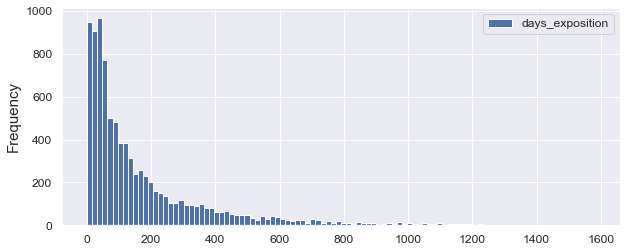

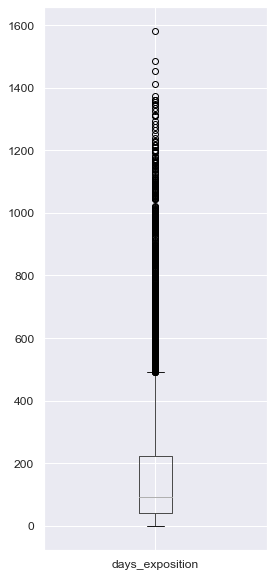

count   8,990.00
mean      174.16
std       212.18
min         1.00
25%        42.00
50%        93.00
75%       222.00
max     1,580.00
Name: days_exposition, dtype: float64

In [78]:
eda_overview('days_exposition') # количество дней размещения объявления

На гистограмме виден пик возле 0 - сразу можно сделать вывод, что большинство квартир продаются в первые месяцы после выставления объявления. Визуально график напоминает распределение Пуассона. В среднем продажа занимает около полугода, медианое значение находится на уровне трёх месяцев. Попробуем ограничить график одним годом:

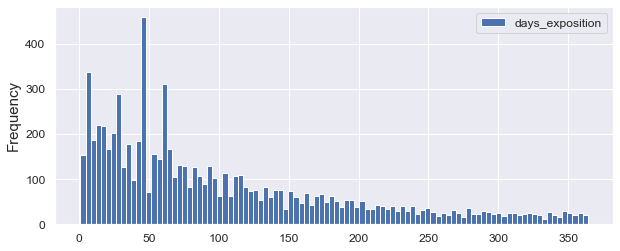

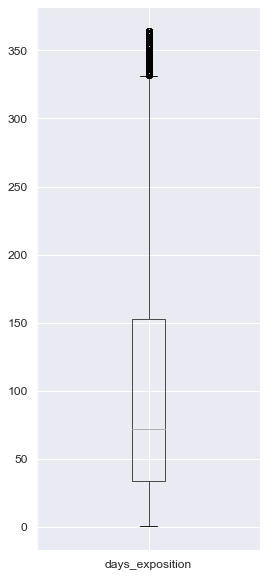

count   7,740.00
mean      103.67
std        89.92
min         1.00
25%        34.00
50%        72.00
75%       153.00
max       364.00
Name: days_exposition, dtype: float64

In [79]:
eda = eda[eda['days_exposition'] <= 365]
eda_overview('days_exposition')

Таким образом можно увидеть, что среднее значение оригинального датасета очень не показательно - оно было на уровне 3 месяцев, хотя на графике, ограниченным одним годом, наглядно видно, что размещение больше 100 дней встречается значительно реже всех остальных случаев. Попробуем ограничить таблицу ещё раз, теперь уже полугодом:

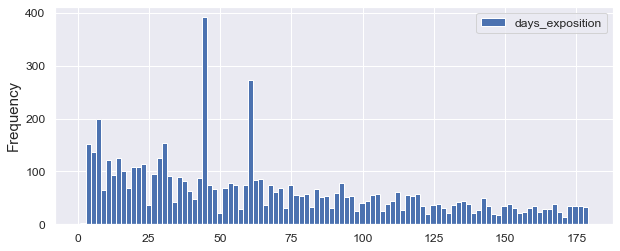

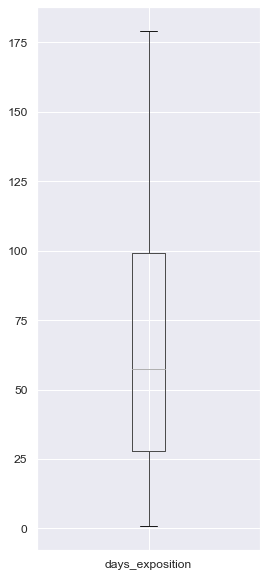

count   6,234.00
mean       66.58
std        47.52
min         1.00
25%        28.00
50%        57.50
75%        99.00
max       179.00
Name: days_exposition, dtype: float64

In [80]:
eda = eda[eda['days_exposition'] <= 180]
eda_overview('days_exposition')

Последний значительный пик значений приходится на два месяца, что совпадает с медианой и средним. Можно считать эту точку оптимальным сроком для продажи квартиры, а всё что продаётся быстрее, можно будет считать быстрой продажей. Точка в полгода будет отсчитывать необычайно долгие продажи, так как такие объявления встречаются значительно реже всех остальных.

#### Вывод

Были подробно изучены параметры площади, цены, числа комнат, высоты потолков и времени продажи квартиры. Большая часть данных стремится к нормальному распределению, но при этом содержит много выбросов и провалов на графиках и редких значений, в целом данные распределены неравномерно.

Нормальными значениями (с точки зрения размаха распределения данных) для квартиры являются следующие параметры:

- Общая площадь от 40м до 65м.
- Цена от 3,4 млн до 5,8 млн.
- Количество комнат - от одной до трёх, количество двухкомнатных и трёхкомнатых квартир сопоставимо друг с другом
- Высота потолков от 2.5м до 2.7м. В данных было много аномалий, в том числе высота 1м (невозможно с точки зрения норм строительства) и 100м (нереалистичный показатель)
- Срок продажи - от одного до трёх месяцев. Срок меньше двух месяцев определён как быстрая продажа, больше полугода - слишком долгая. 

### Факторы, влияющие на стоимость квартиры

Выделим три группы факторов для изучения стоимости квартир:
1. Площадь, число комнат, удалённость от центра.
2. Этаж (первый, последний или другой)
3. Дата размещения (день недели, месяц, год)

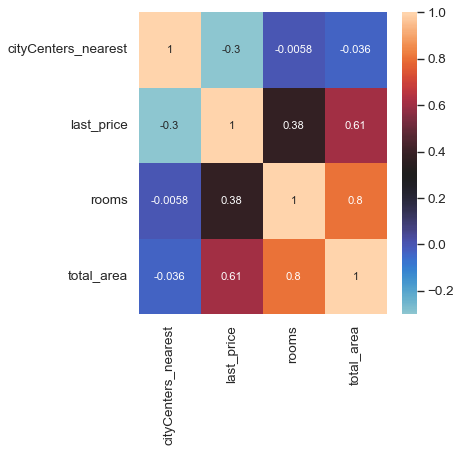

In [81]:
# сделаем тепловую карту корреляции факторов первой группы

plt.figure(figsize=(5,5), dpi= 80)

sns.heatmap(
    
    eda.pivot_table(index=eda.index, 
    values=['last_price', 'total_area','rooms','cityCenters_nearest'])
    .corr(), center=0.3, annot=True
)
plt.show()

Из рассмотренных факторов цена имеет значительную корреляцию только с общей площадью квартиры, коэффициент составляет ~0.6.

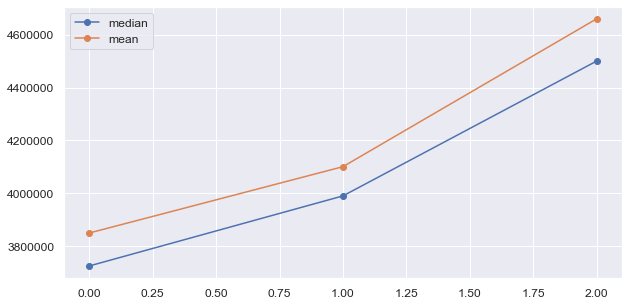

In [82]:
# построим график по второй группе факторов - посмотрим на изменение цены по типу этажа

(eda
 .pivot_table(index='floor_type', values='last_price', aggfunc=['median','mean'])
 .droplevel(1,axis=1)
 .reset_index()
 .plot(style='o-', grid=True,figsize=[10,5])
)
 
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Цена явно зависит от этажа - в среднем самая низкая у квартир на первом этаже, дальше - на последнем, а если этаж ни первый ни последний - цена значительно выше.

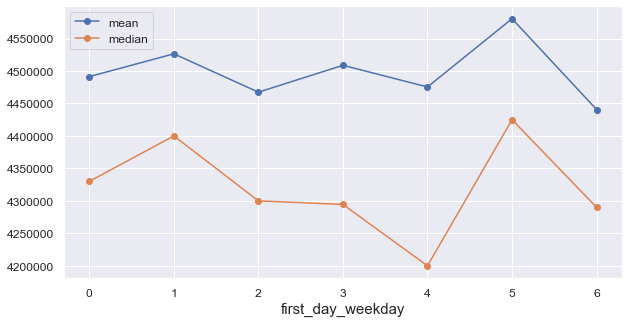

In [83]:
# для последней группы понадобится три отдельных графика, потому напишем функцию

date_list = ['first_day_weekday','first_day_month', 'first_day_year']

def date_price_plot(index):    
    (eda
 .pivot_table(index=date_list[index], values='last_price', aggfunc=['mean','median'])
 .droplevel(1,axis=1) 
 .plot(style='o-', grid=True,figsize=[10,5]))

    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

date_price_plot(0) # изменение цены по дням недели

На горизонтальной оси графики обозначены дни недели от 0 (понедельник) до 6 (воскресенье). Поведение медианного и среднего в целом схоже, за исключением провала медианы в пятницу - по неизвестной причине, при размещении объявления в этот день, медианная цена продажи квартиры значительно снижается, тогда как среднее остаётся примерно на том же уровне. Оба значения достигают пика в субботу.

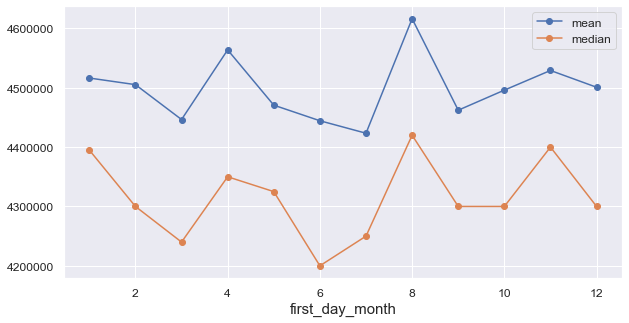

In [84]:
date_price_plot(1) # изменение цены по месяцам

Поведение значений здесь отличается - несмотря на то, что оба пика приходятся на август, провалы в разных местах - у медианы нижняя точка находится в июне, у среднего - в июле. В целом движение значений можно описать следующим образом:
1. В январе начинается падение цен.
2. Цены поднимаются в апреле
3. Снова падают
4. Поднимаются летом и достигают пика в августе
5. Осенью начинают падать
6. Небольшой  скачок в ноябре, после снова падение

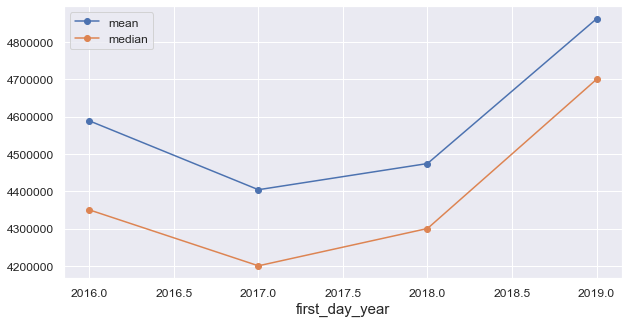

In [85]:
date_price_plot(2) # изменение цены по годам

В течении 2016 года цены падают, в течении же 2017 снова начинают расти, достигая пика в 2019 году.

#### Вывод

- Цена имеет значительную корреляцию с общей площадью квартиры, коэффициент составляет ~0.6.


- Цена явно зависит от этажа - в среднем самая низкая у квартир на первом этаже, дальше - на последнем, а если этаж ни первый ни последний - цена значительно выше.


- Поведение медианного и среднего цены по дням недели в целом схоже, за исключением провала медианы в пятницу - по неизвестной причине, при размещении объявления в этот день, медианная цена продажи квартиры значительно снижается, тогда как среднее остаётся примерно на том же уровне. Оба значения достигают пика в субботу.


- Динамику цены по месяцам можно описать следующим образом:
1. С января начинается падение цен.
2. Цены поднимаются в апреле
3. Снова падают
4. Поднимаются летом и достигают пика в августе
5. Осенью начинают падать
6. Небольшой  скачок в ноябре, после снова падение


- В течении 2016 года цены падают, в течении же 2017 снова начинают расти, достигая пика в 2019 году.

### 10 населённых пунктов с наибольшим числом объявлений. 

In [86]:
locality_list = eda['locality_name'].value_counts().head(10).index.to_list() # создадим список поселений

# сделаем сводную таблицу с указанием средней цены за квадратный метр

(eda
 [eda['locality_name'].isin(locality_list)] 
 .pivot_table(index='locality_name', values='price_per_square', aggfunc=['count','mean'])
 .droplevel(1,axis=1)
 .sort_values('mean', ascending=False)
 .rename(columns={'mean':'mean_price'})
)

,count,mean_price
locality_name,,
Санкт-Петербург,4155,"103,326.50"
Пушкин,89,"98,244.92"
деревня Кудрово,75,"90,049.96"
поселок Парголово,87,"89,527.03"
поселок Мурино,137,"87,939.35"
Петергоф,71,"82,184.66"
поселок Шушары,114,"78,419.84"
Колпино,115,"75,431.30"
Гатчина,82,"70,291.63"


#### Вывод

Самая высокая цена за квадратный метр выявлена в Санкт-Петербурге, у него же первое место по количеству объявлений. Самая же низкая цена в городе Всеволожск, самое малое количество объявлений - в городе Петергоф.

### Анализ объявлений в центре Санкт-Петербурга

Для начала необходимо выяснить, какая область города входит в центр. Создадим столбец с расстоянием до центра в километрах на основе данных из `cityCenters_nearest`, посчитаем среднюю цену для каждого километра и построим график:

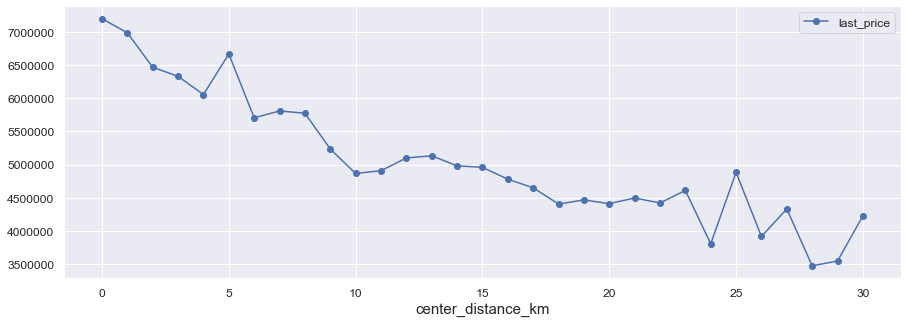

In [87]:
eda['center_distance_km'] = round(eda['cityCenters_nearest']/1000, 0) # добавляем новый столбец

#создадим сводную таблицу с расстоянием в км и ценой квартиры, ограничив расстояние до 30км, затем построим график

(eda[eda['center_distance_km'] <= 30]
 .pivot_table(index='center_distance_km', values='last_price')
 .plot(style='o-', grid=True,figsize=[15,5])
)

plt.ticklabel_format(style='plain', axis='y')
plt.show()

После отметки в 5км динамика графика явно идёт на спад, потому можно смело обозначить эту точку как "центр".
Теперь повторим анализ основных параметров и факторов влияния на стоимость квартиры, но уже для центра СПБ.

In [88]:
spb_eda = eda[(eda['locality_type'] == 'city') & (eda['center_distance_km'] >= 5)] # датафрейм с объявления из центра СПБ

In [89]:

def spb_eda_overview(data): # обновим функцию для вывода описательной статистики и диаграммы размаха 
    
    spb_eda[data].plot(kind='hist', bins=50, figsize=[10,4], grid=True, legend=True, use_index=True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    spb_eda.boxplot(data, figsize=[4,10])
    plt.show()
    display(spb_eda[data].describe())

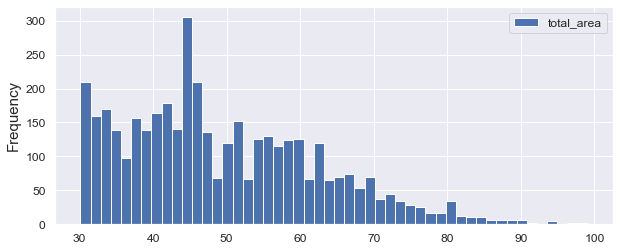

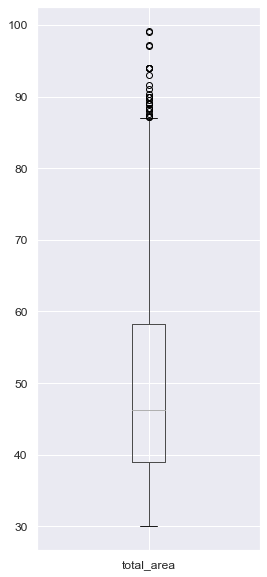

count   4,060.00
mean       49.43
std        13.27
min        30.10
25%        39.00
50%        46.26
75%        58.20
max        99.10
Name: total_area, dtype: float64

In [90]:
# начнём с общей площади

spb_eda_overview('total_area')

Как и при анализе общей базы, на графика видно много редких значений и выбросов в сторону увеличения площади. Срежем данные до 70м, чтобы избавится от редких значений и выбросов:

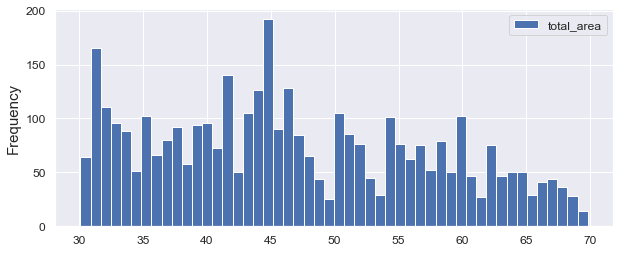

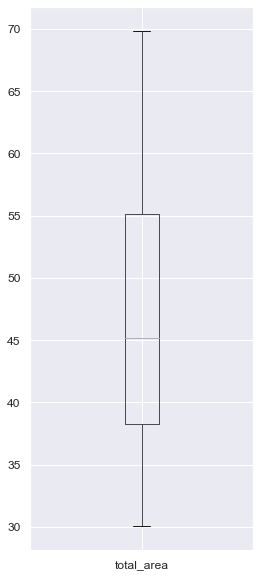

count   3,712.00
mean       46.85
std        10.56
min        30.10
25%        38.30
50%        45.20
75%        55.12
max        69.80
Name: total_area, dtype: float64

In [91]:
spb_eda = spb_eda[spb_eda['total_area'] < 70] # убираем данные квартир площадью больше 70м
spb_eda_overview('total_area')

На диаграмме размаха больше нет выбросов, но распределение значений по гистограмме содержит много пиковых значений и провал посередине, идентично объявлениям по всей базе.

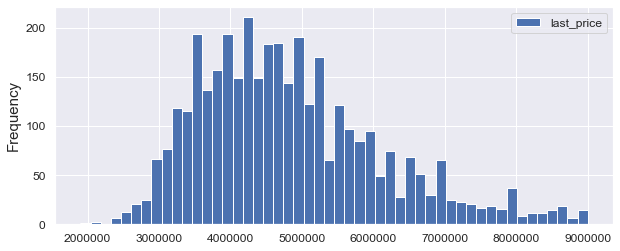

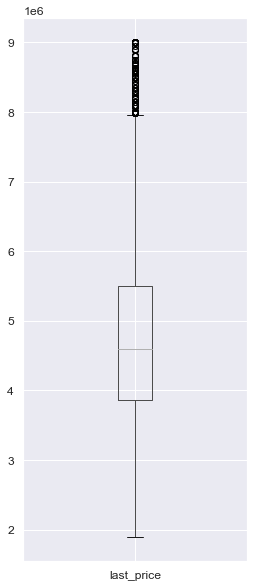

count       3,712.00
mean    4,829,508.71
std     1,288,359.45
min     1,900,000.00
25%     3,859,750.00
50%     4,600,000.00
75%     5,500,000.00
max     9,000,000.00
Name: last_price, dtype: float64

In [92]:
spb_eda_overview('last_price') #данные с ценой продажи квартиры

Визуально напоминает нормальное распределение, но также присутствует большое провалов. Уберём объявления с квартирами дешевле 3,000,000 и дороже 7,000,000 для избавления от выбросов и редких значений:

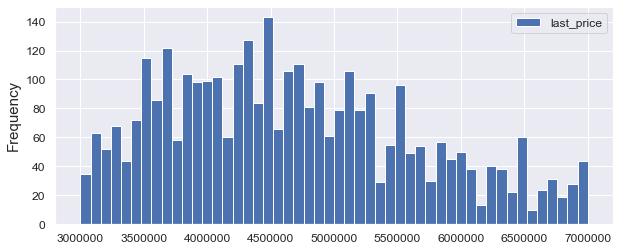

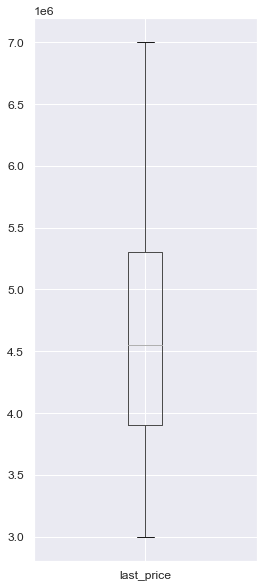

count       3,353.00
mean    4,675,065.86
std       981,742.58
min     3,000,000.00
25%     3,900,000.00
50%     4,550,000.00
75%     5,300,000.00
max     7,000,000.00
Name: last_price, dtype: float64

In [93]:
spb_eda = spb_eda[spb_eda['last_price'] <=7000000]
spb_eda = spb_eda[spb_eda['last_price'] >=3000000]

spb_eda_overview('last_price')

Получаем такую же картину - распределение значений неравномерно, много провалов.

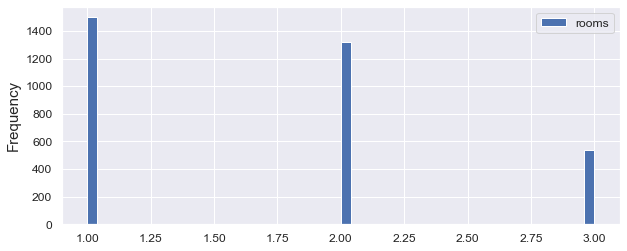

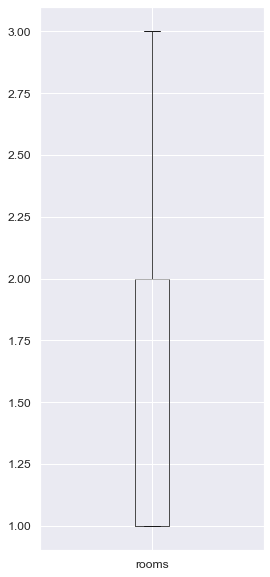

count   3,353.00
mean        1.71
std         0.72
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         3.00
Name: rooms, dtype: float64

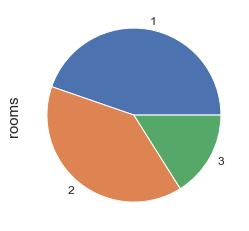

In [94]:
spb_eda_overview('rooms') # число комнат
spb_eda['rooms'].value_counts().plot.pie() # посмотрим на данные в виде круговой диаграммы
plt.show()

Выводы такие же = трёхкомнатные квартиры встречаются значительно реже остальных, количество однокомнатных и двухкомнатных квартир сопоставимо.

Переходим к следующему параметру:

Ну и тут разницы нет. Все верно 

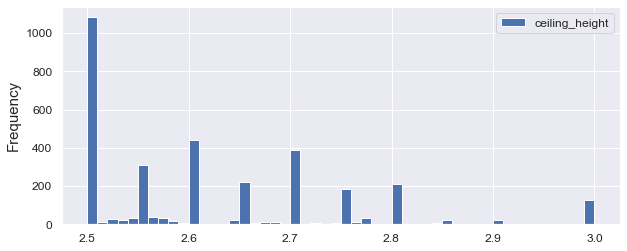

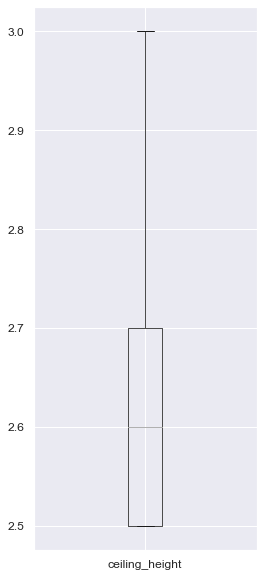

count   3,353.00
mean        2.62
std         0.13
min         2.50
25%         2.50
50%         2.60
75%         2.70
max         3.00
Name: ceiling_height, dtype: float64

In [95]:
spb_eda_overview('ceiling_height') # высота потолков

Большая часть квартир имеет высоту 2.5 метров, что соответствует минимально разрешённой высоте жилого помещения в РФ. Нормальные значения диаграммы размаха лежат между 2.5м и 2.7м - вывод идентичен анализу всех населённых пунктов.

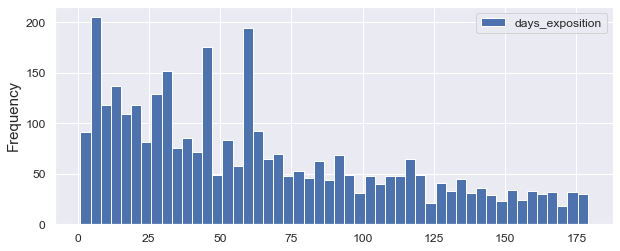

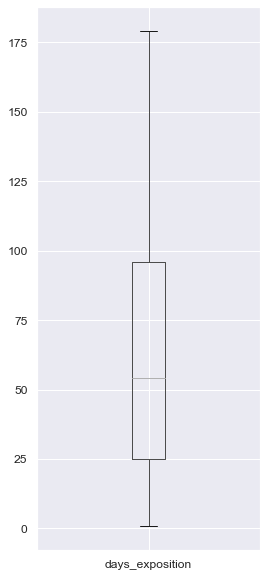

count   3,353.00
mean       63.93
std        47.37
min         1.00
25%        25.00
50%        54.00
75%        96.00
max       179.00
Name: days_exposition, dtype: float64

In [96]:
spb_eda_overview('days_exposition') # количество дней размещения объявления

Пики гистограммы приходятся на первые три месяца, в рамках ящика диаграммы размаха. Выводы для общей базы справедливы и здесь -за точку отсчёта быстрой проадажи квартиры можно принять медиану (около 2 месяцев), а точка в полгода будет отсчитывать необычайно долгие продажи, так как такие объявления встречаются значительно реже всех остальных.

Для анализа факторов влияния на стоимость квартиры используем те же три группы факторов:
1. Площадь, число комнат, удалённость от центра.
2. Этаж (первый, последний или другой)
3. Дата размещения (день недели, месяц, год)

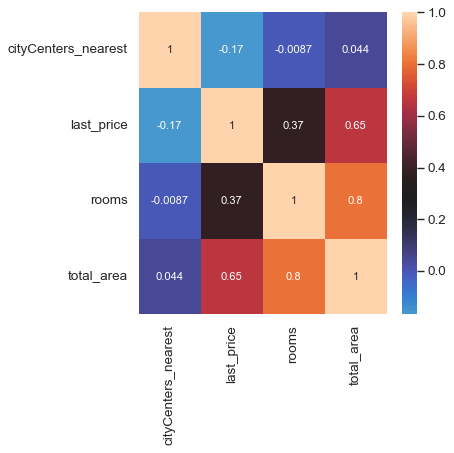

In [97]:
# сделаем тепловую карту корреляции факторов первой группы

plt.figure(figsize=(5,5), dpi= 80)

sns.heatmap(
    
    spb_eda.pivot_table(index=spb_eda.index, 
    values=['last_price', 'total_area','rooms','cityCenters_nearest'])
    .corr(), center=0.3, annot=True
)
plt.show()

Из рассмотренных факторов цена имеет значительную корреляцию только с общей площадью квартиры, коэффициент составляет 0.65 - чуть больше, чем по общей базе(~0.6).

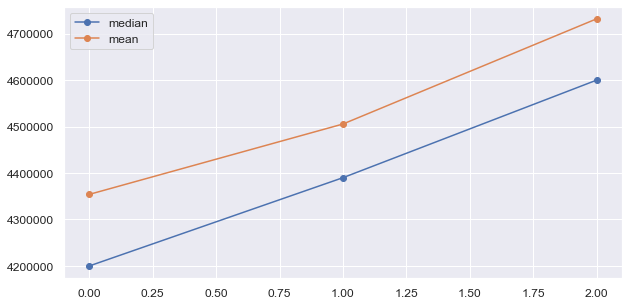

In [98]:
# построим график по второй группе факторов - посмотрим на изменение цены по типу этажа

(spb_eda
 .pivot_table(index='floor_type', values='last_price', aggfunc=['median','mean'])
 .droplevel(1,axis=1)
 .reset_index()
 .plot(style='o-', grid=True,figsize=[10,5])
)
 
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Цена также явно зависит от этажа - в среднем самая низкая у квартир на первом этаже, дальше - на последнем, а если этаж ни первый ни последний - цена значительно выше.

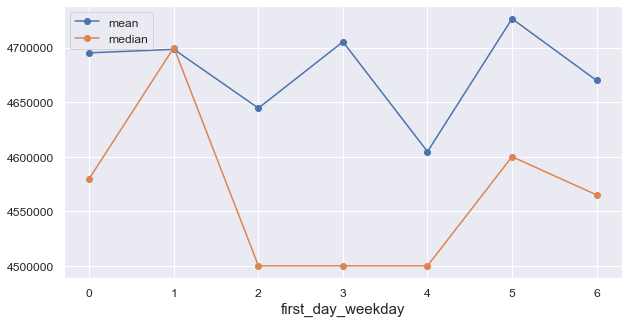

In [99]:
# обновим функцию для построения графиков

date_list = ['first_day_weekday','first_day_month', 'first_day_year']

def date_price_plot(index):    
    (spb_eda
 .pivot_table(index=date_list[index], values='last_price', aggfunc=['mean','median'])
 .droplevel(1,axis=1) 
 .plot(style='o-', grid=True,figsize=[10,5]))

    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

date_price_plot(0) # изменение цены по дням недели

Вот и первое серьёзные отличия СПБ от общей базы:

- Пик медианы теперь приходится на вторник (вместо субботы) и полностью совпадает со средним значением.
- Медиана проваливается вниз на три дня, со среды по пятницу
- У среднего провал в пятницу (в общей базе минимальное значение достигается в воскресенье)


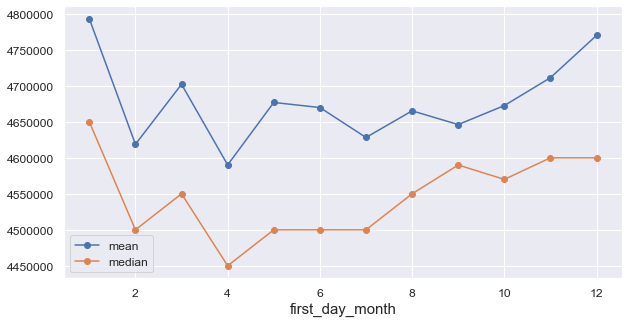

In [100]:
date_price_plot(1) # изменение цены по месяцам

Динамика цен отличается от общей базы - пиковые значения приходятся на январь вместо августа. Динамика следующая:
1. Цена находятся на пике в начале января, начинается падение
2. Скачок цен в марте, после падение до минимума в апреле
3. Постепенный рост оставшийся год

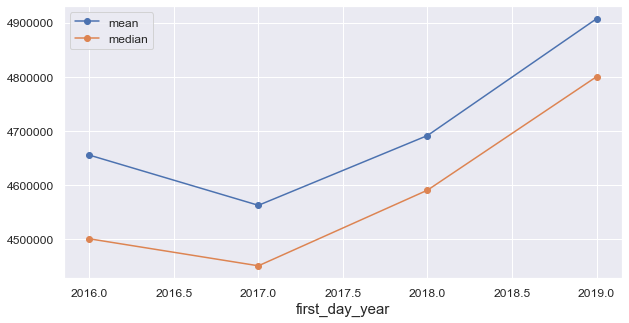

In [101]:
date_price_plot(2) # изменение цены по годам

В течении 2016 года цены также падают, в течении же 2017 снова начинают расти, достигая пика в 2019 году.

#### Вывод

In [102]:
spb_share = round(len(spb_eda)/len(eda)*(100), 1) # посчитаем долю объявлений из СПБ
print(f'Доля объявления из центра СПБ от общей базы составляет {spb_share}%.')

Доля объявления из центра СПБ от общей базы составляет 53.8%.


Выводы по анализу объявлений по продаже квартир в центре Санкт-Петербурга практически идентичны выводам по общей базе. Скорее всего это обусловлено тем, что доля этих объявлений составляет чуть больше половины от всей базы, тем самым оказывая значительное влияние на формирование основных показателей. Серьёзные отличия лишь в динамике изменения цен в зависимости от дня недели и месяца.

Динамика по дням недели:
- Пик медианы теперь приходится на вторник (вместо субботы) и полностью совпадает со средним значением.
- Медиана проваливается вниз на три дня, со среды по пятницу
- У среднего провал в пятницу (в общей базе минимальное значение достигается в воскресенье)

Динамика по месяцам
- Цена находятся на пике в начале января, начинается падение
- Скачок цен в марте, после падение до минимума в апреле
- Постепенный рост оставшийся год

## Общий вывод

___
**Рекомендации**

Ниже приведены несколько тезисов, реализация которых поможет значительно улучшить качество анализа данных.

- Необходимо оптимизировать сбор данных путём использования единого набора показателей для всех населёных пунктов, а если это не преминимо (например, расстояние до центра в деревне/посёлке), то необходимо выгружать и анализировать данные отдельно по каждой группе населённых пунктов, имеющих общие признаки.
- Все поля для заполнения клиентами должны быть обязательными, а также иметь разумные ограничения (например, не принимать объявление с высотой потолков 1м или ценой продажи 12,190).
- Необходимо доработать систему расчёта данных на основе картографических показателей - предположительно именно она является основным источником пропущенных значений. Также можно добавить дополнительные параметры, которые могут влиять на стоимость недвижимости (ближайшая станция метро/остановка общественного транспорта, наличии поблизости школ или детских садов, продуктовых магазинов).
- Реализовать автоматическую подгрузку дополнительных данных о недвижимости из открытых источников (например, год постройки дома, округ/район)
___

Целью исследования являлось установление параметров для определения рыночной стоимости объектов недвижимости, основываясь на данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Это позволит построить автоматизированную систему, которая сможет отслеживать аномалии и мошенническую деятельность.

При обзоре данных была совершена проверка на возможные ошибки, которые могли помещать исследованию. После была совершена предобработка данных с целью исправления ошибок и обработки пропущенных значений, были изменены типы данных. Затем на основе обработанных данных были расчитаны необходимые дополнительные параметры, что позволило провести полноценный исследовательский анализ данных.

Таким образом, исследование прошло в пять этапов:

- Обзор данных
- Предобработка данных
- Расчёт дополнительных параметров
- Исследовательский анализ данных
- Формирование общего вывода

В изначальном датасете больше половины столбцов содержали пропущенные значения. При детальном рассмотрении выяснилось, что в части из них доля пропусков в среднем составлял около 0.5%, что не может повлиять на результаты исследования, в связи с чем данные были удалены.

Для заполнения остальных пропущенных значений чаще всего был использован метод расчёта медианных значений группированных дат на основе их корреляции. Но, к сожалению, не для всех значений имелись необходимыв для подобного метода данных, в связи с чем датасет всё еще содержит пропущенные значения в некоторых столцах. Предположительно наличие пропусков обусловлено тем, что данные этого столбца получены от пользователей напрямую, что могло привести к ошибкам ручного ввода. Также возможен вариант, что данные являются необязательными для заполнения при подачи объявления. 

В ходе предобработки к столбцу с названиями населённых пунктов был применён метод категоризации, что стало хорошей опцией для дополнительной группировки данных. Таким образом удалось выяснить, что доля пропущенных значений очень отличается в зависимости от типа поселений - в небольших населенных пунктах, например, пропущенно 100% значений столбце с расстоянием до аэропорта, с информацией о парках, прудах и расстоянии до центра города. В категориях более крупных населённых пунктах в этих столбцах пропущено больше половины значений, а вот в категории объявлений из СПБ наоборот - большая часть данных указана. Визуализация этих пропусков показала, что корреляция первых трёх категорий практически совпадает - скорее всего значения пропущены по одной и той же причине. Предположительно для поселений вне крупных городов информация о близости аэропорта или центра города не настолько актуальна. Объявления из СПБ явно обладают наиболее полной информацей об объекте недвижимости, что лишний раз указывает на вероятность того, что в зависимости от города/типа поселения продавцам квартир предлагается указать отличные от друг друга наборы данных с информацией о квартире. Если же эти данные получены не от пользователей, а расчитаны автоматически - это явно указывает на то, что системе хватает ресурсов делать полноценные расчёты только в черте крупных поселений.

Были подробно изучены параметры площади, цены, числа комнат, высоты потолков и времени продажи квартиры. Большая часть данных стремится к нормальному распределению, но при этом содержит много выбросов и провалов на графиках и редких значений, в целом данные распределены неравномерно.

Нормальными значениями (с точки зрения размаха распределения данных) для квартиры являются следующие параметры:

- Общая площадь от 40м до 65м.
- Цена от 3,4 млн до 5,8 млн.
- Количество комнат - от одной до трёх, количество двухкомнатных и трёхкомнатых квартир сопоставимо друг с другом
- Высота потолков от 2.5м до 2.7м. В данных было много аномалий, в том числе высота 1м (невозможно с точки зрения норм строительства) и 100м (нереалистичный показатель)
- Срок продажи - от одного до трёх месяцев. Срок меньше двух месяцев определён как быстрая продажа, больше полугода - слишком долгая. 

В ходе анализа факторов влияния на цену были сделаны следующие выводы:

- Цена имеет значительную корреляцию с общей площадью квартиры, коэффициент составляет ~0.6.


- Цена явно зависит от этажа - в среднем самая низкая у квартир на первом этаже, дальше - на последнем, а если этаж ни первый ни последний - цена значительно выше.


- Поведение медианного и среднего цены по дням недели в целом схоже, за исключением провала медианы в пятницу - по неизвестной причине, при размещении объявления в этот день, медианная цена продажи квартиры значительно снижается, тогда как среднее остаётся примерно на том же уровне. Оба значения достигают пика в субботу.


- Динамику цены по месяцам можно описать следующим образом:
1. С января начинается падение цен.
2. Цены поднимаются в апреле
3. Снова падают
4. Поднимаются летом и достигают пика в августе
5. Осенью начинают падать
6. Небольшой  скачок в ноябре, после снова падение


- В течении 2016 года цены падают, в течении же 2017 снова начинают расти, достигая пика в 2019 году.


- Самая высокая цена за квадратный метр выявлена в Санкт-Петербурге, у него же первое место по количеству объявлений. Самая же низкая цена в городе Всеволожск, самое малое количество объявлений - в городе Петергоф.

Также отдельно были проанализированы объявления о продаже квартир в центре Петербурга. Выводы по анализу практически идентичны выводам по общей базе. Скорее всего это обусловлено тем, что доля этих объявлений составляет чуть больше половины от всей базы, тем самым оказывая значительное влияние на формирование основных показателей. Серьёзные отличия лишь в динамике изменения цен в зависимости от дня недели и месяца.

Динамика по дням недели:
- Пик медианы теперь приходится на вторник (вместо субботы) и полностью совпадает со средним значением.
- Медиана проваливается вниз на три дня, со среды по пятницу
- У среднего провал в пятницу (в общей базе минимальное значение достигается в воскресенье)

Динамика по месяцам
- Цена находятся на пике в начале января, начинается падение
- Скачок цен в марте, после падение до минимума в апреле
- Постепенный рост оставшийся год